# Libraries

In [1]:
import pandas as pd
import numpy as np
import dash
from dash import Dash
import seaborn as sns
from dash import html
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

# Reading Data

In [2]:
df = pd.read_csv('/Users/vishal/Desktop/Way to New World/University/01_All_Semesters/02_Semester/01_Visualization of Complex Data/05_Projects/Patient-Survival-Prediction---Dash-Visualization/dataset/Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [4]:
df.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
Null_Values = df.isna().sum()/len(df)
Null_Values.sort_values(ascending=False, inplace=True)
round(Null_Values,2)

h1_bilirubin_min         0.92
h1_bilirubin_max         0.92
h1_lactate_max           0.92
h1_lactate_min           0.92
h1_albumin_max           0.91
                         ... 
icu_type                 0.00
pre_icu_los_days         0.00
readmission_status       0.00
apache_post_operative    0.00
encounter_id             0.00
Length: 186, dtype: float64

In [10]:
df_dropped = df.copy()
for cols in df_dropped.columns:
    if df_dropped[cols].isna().sum()/len(df_dropped) > 0.40:
        df_dropped = df_dropped.drop(cols, axis=1)

In [12]:
df_dropped.isna().sum()/len(df_dropped)

encounter_id                   0.000000
patient_id                     0.000000
hospital_id                    0.000000
hospital_death                 0.000000
age                            0.046100
                                 ...   
leukemia                       0.007796
lymphoma                       0.007796
solid_tumor_with_metastasis    0.007796
apache_3j_bodysystem           0.018122
apache_2_bodysystem            0.018122
Length: 112, dtype: float64

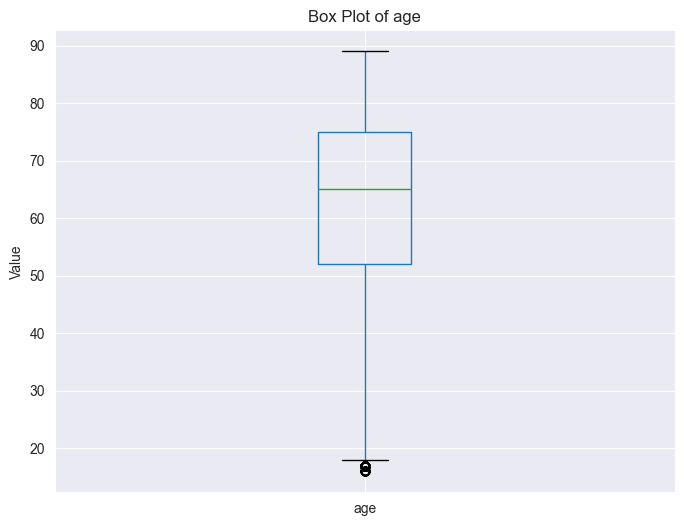

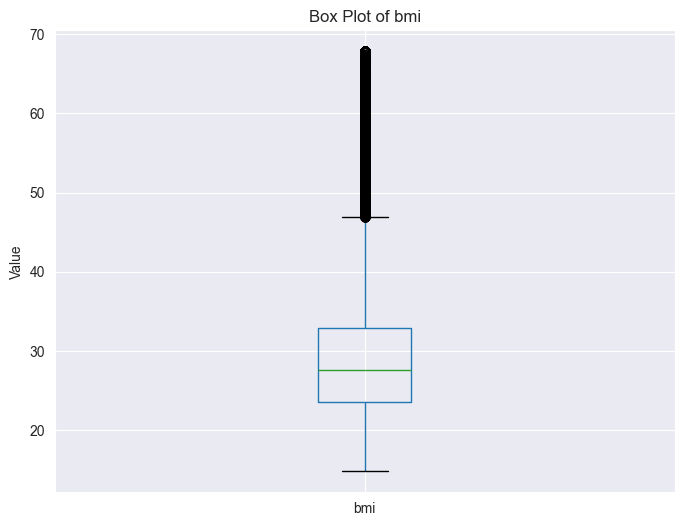

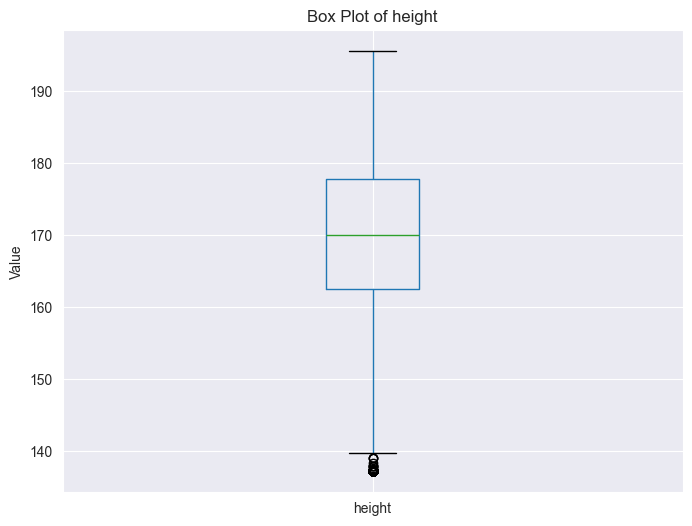

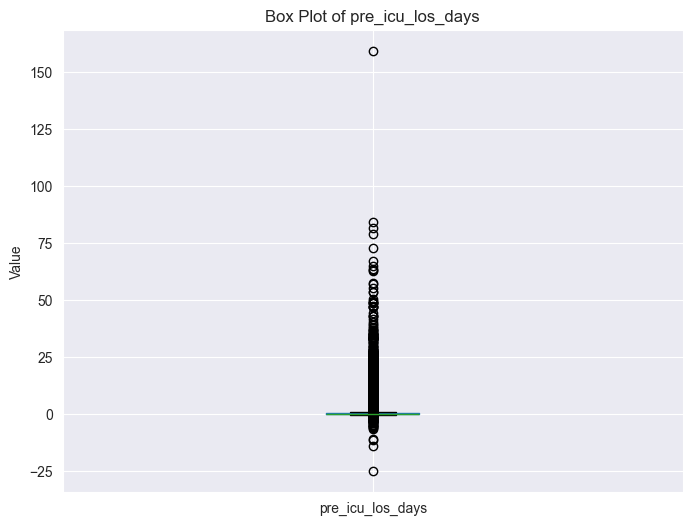

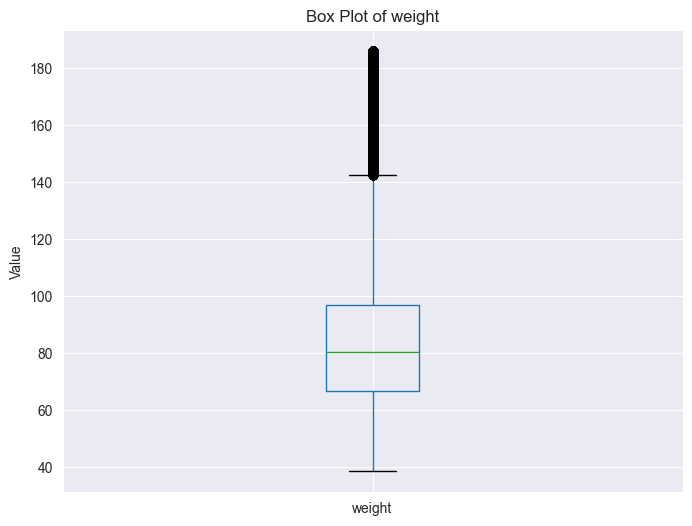

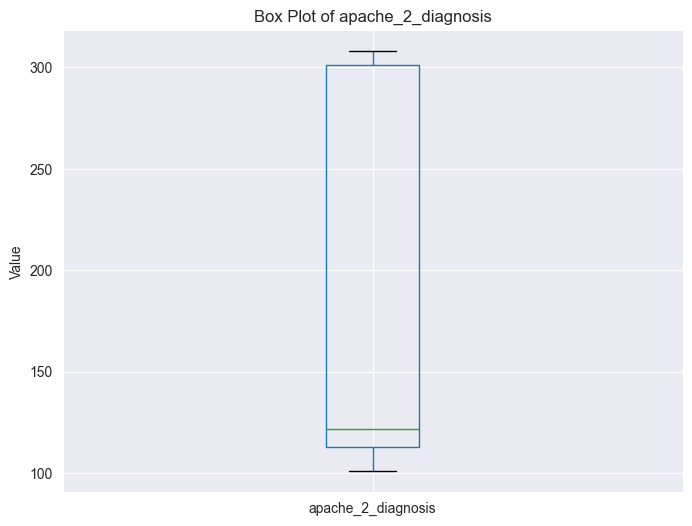

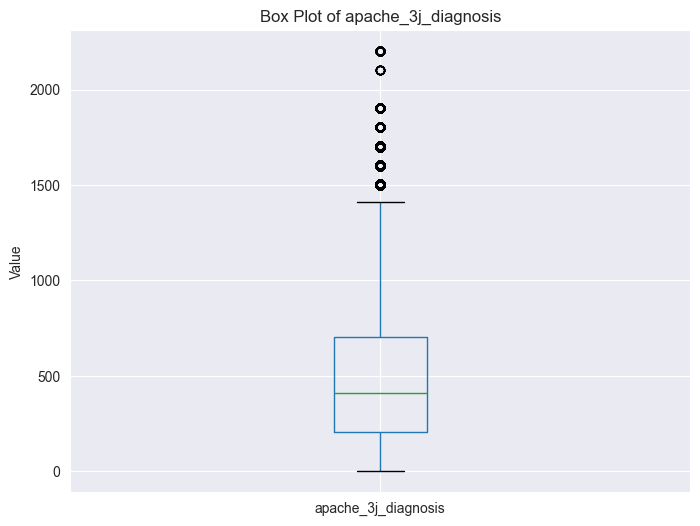

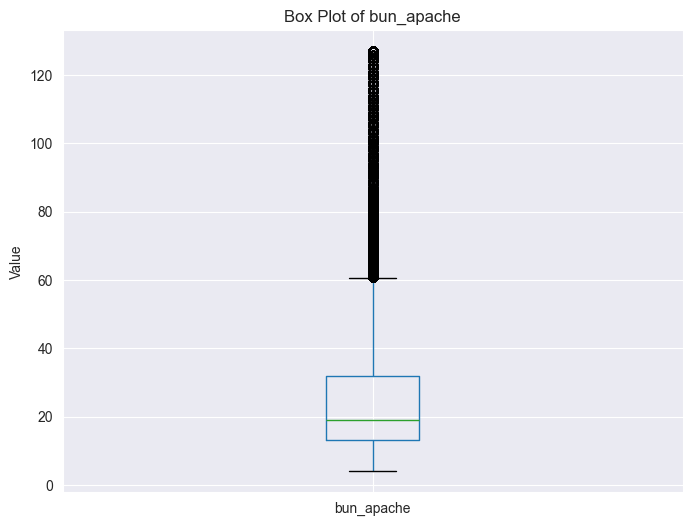

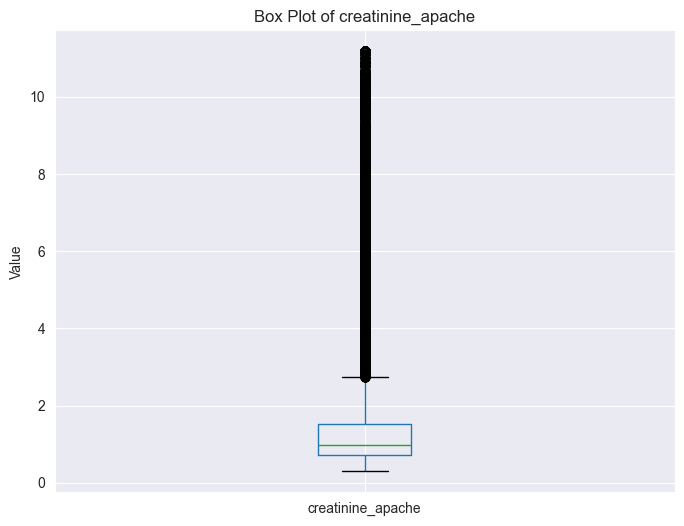

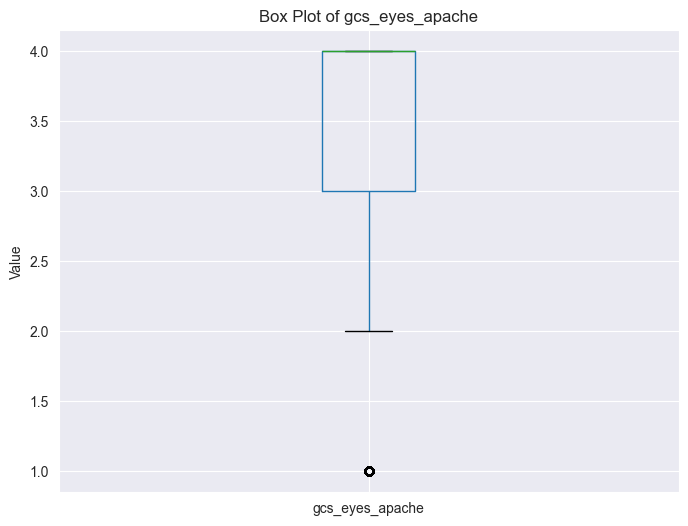

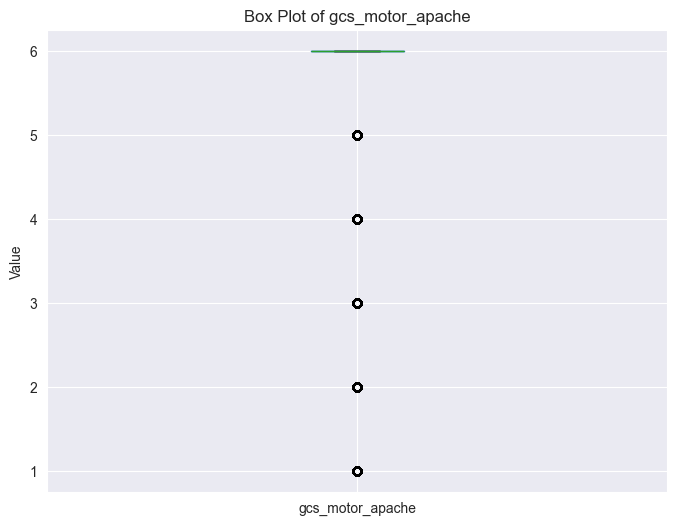

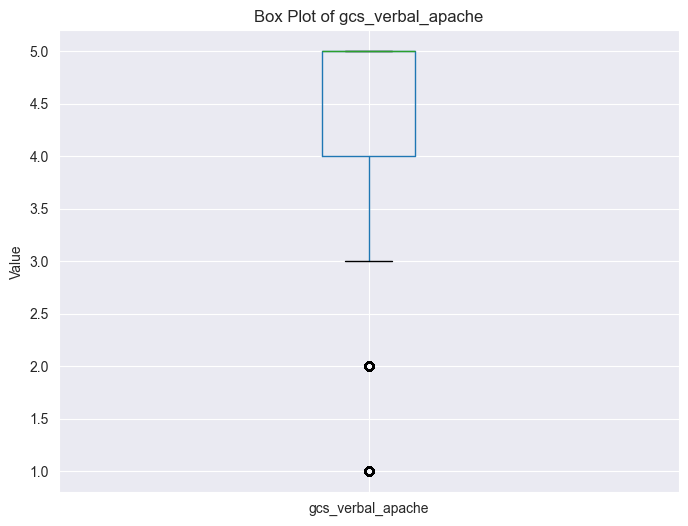

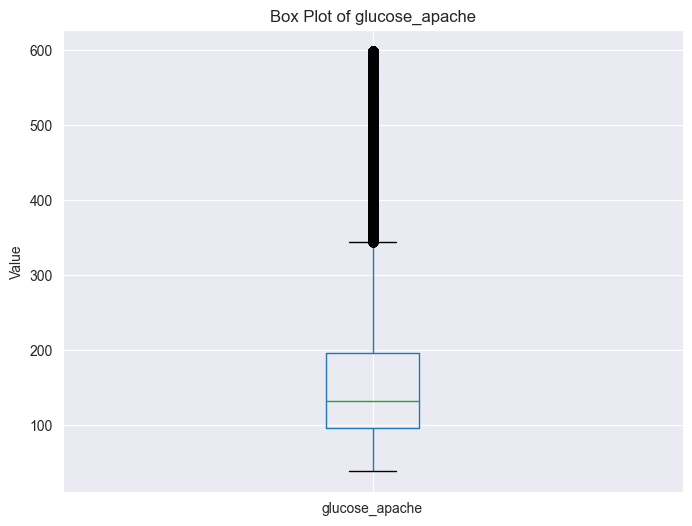

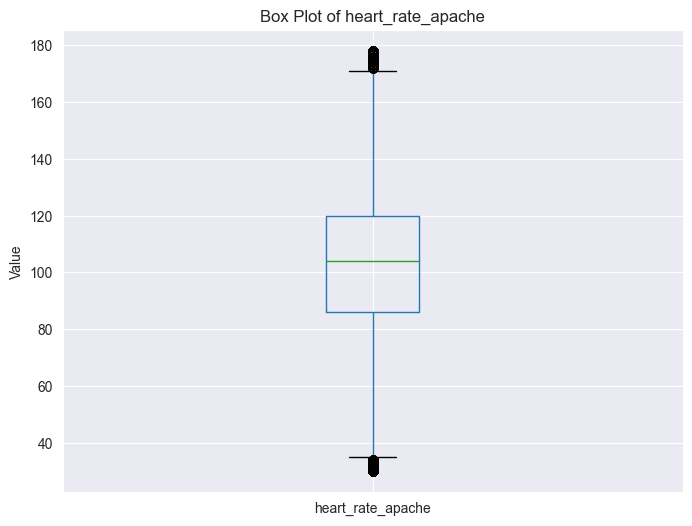

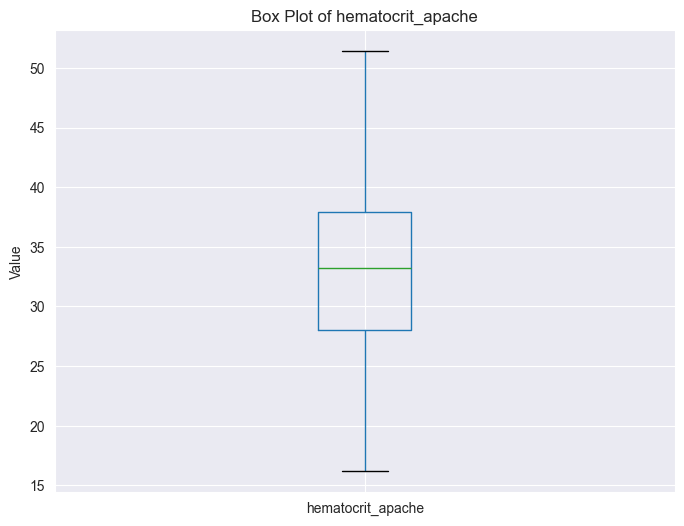

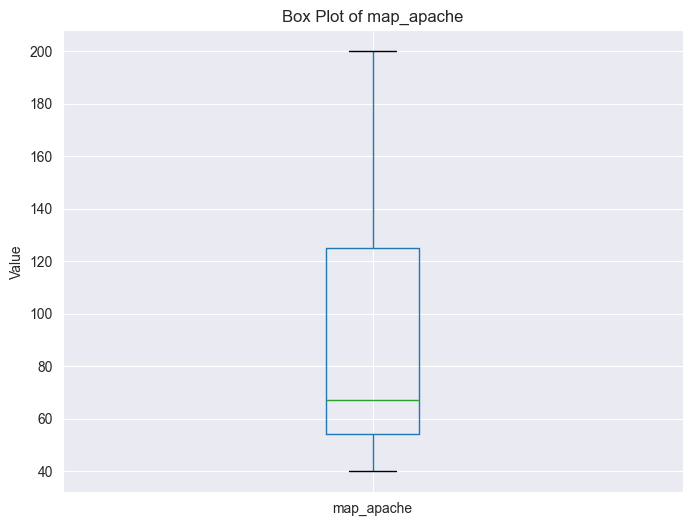

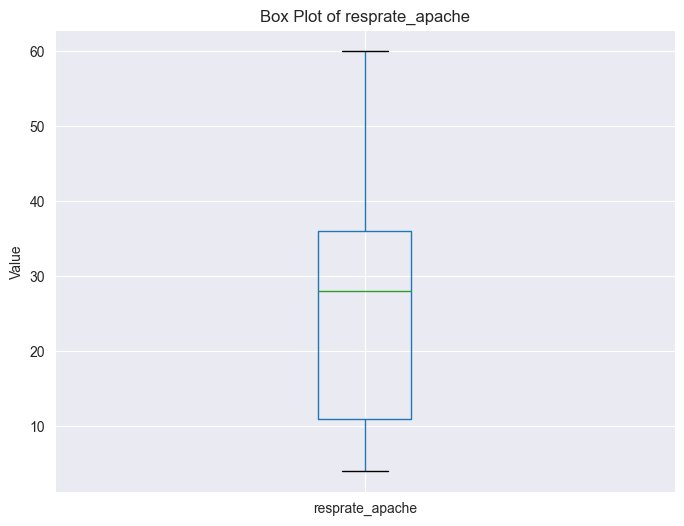

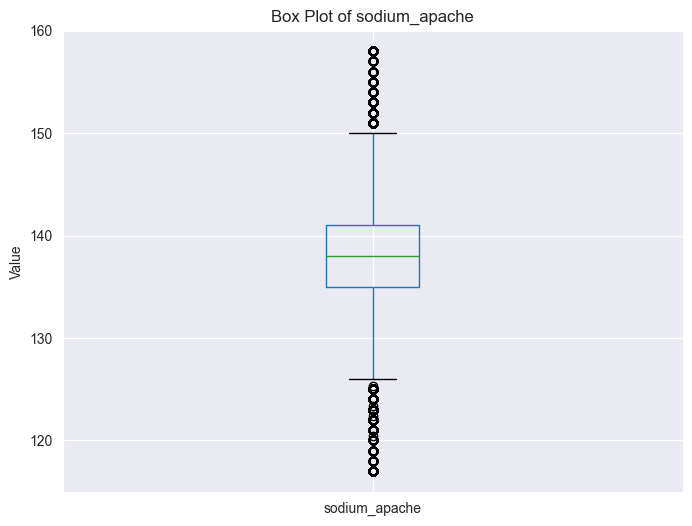

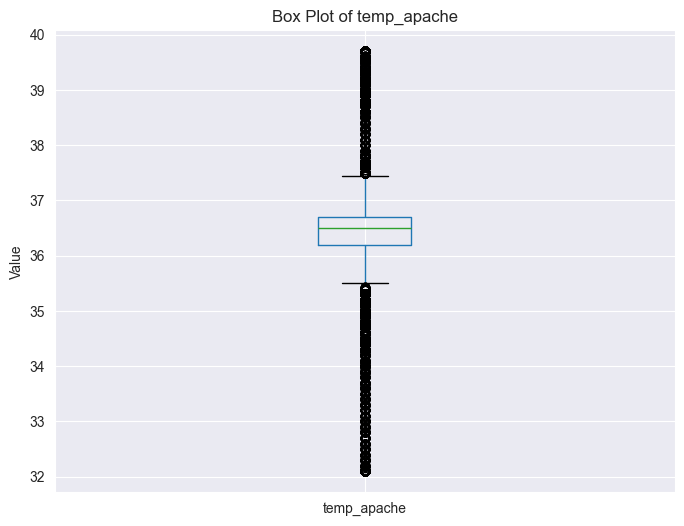

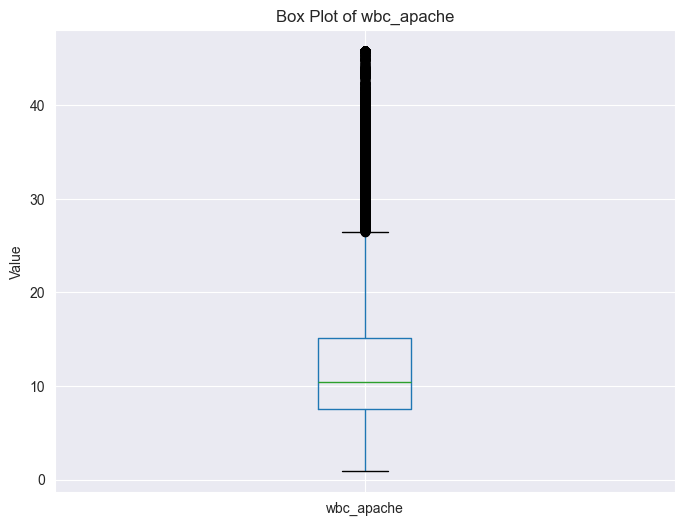

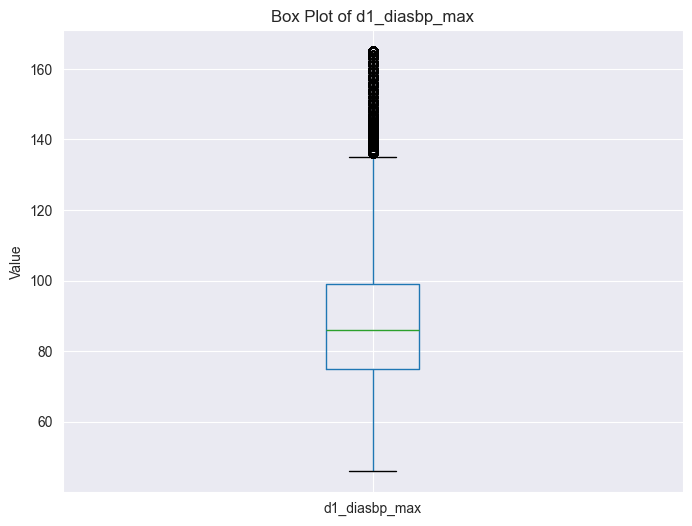

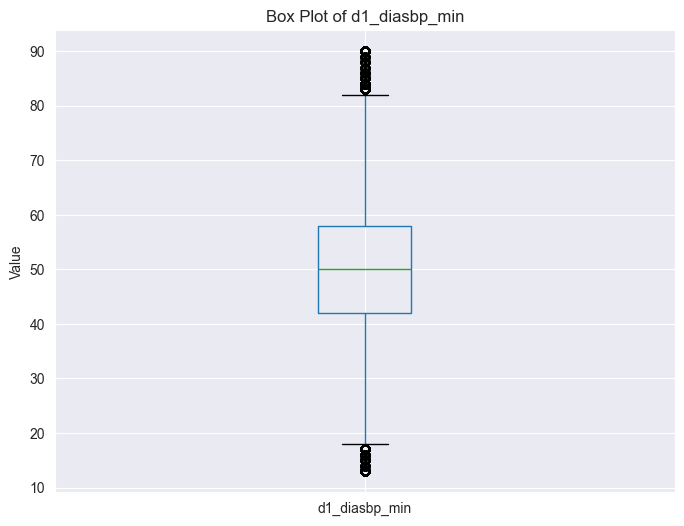

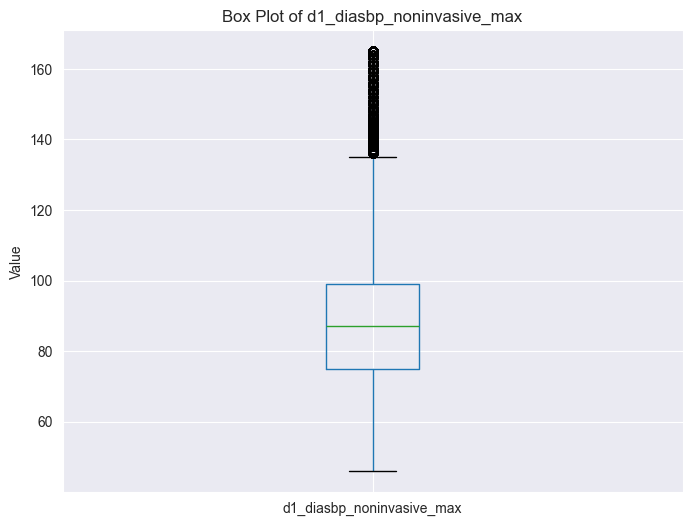

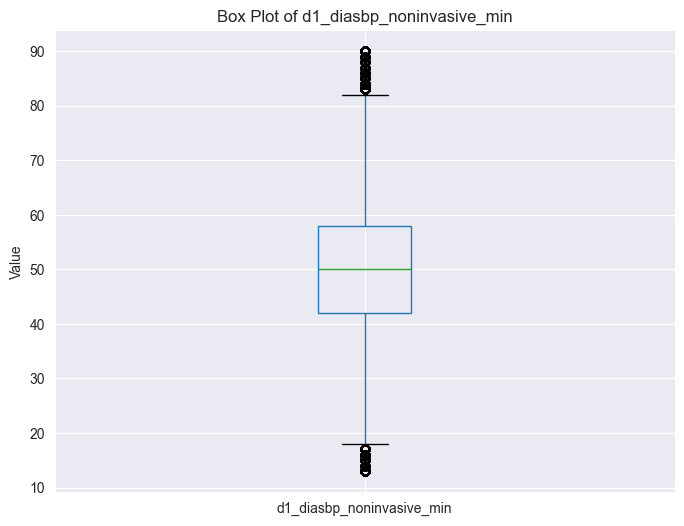

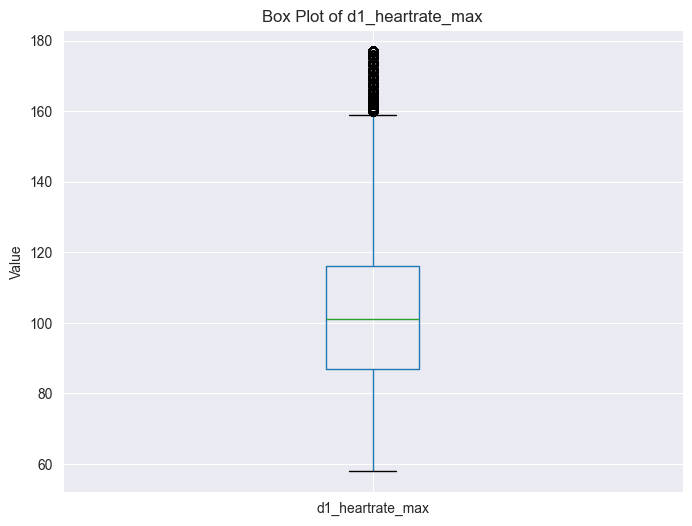

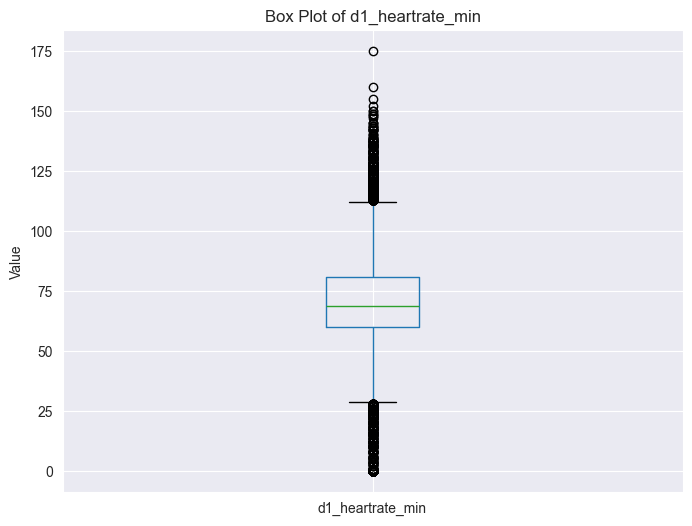

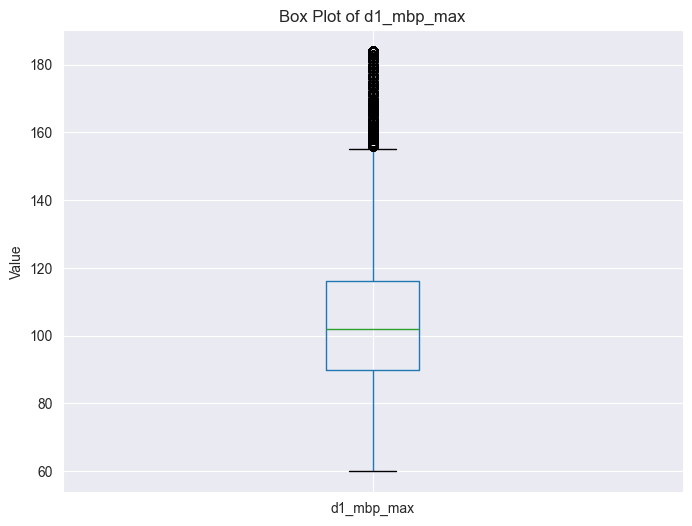

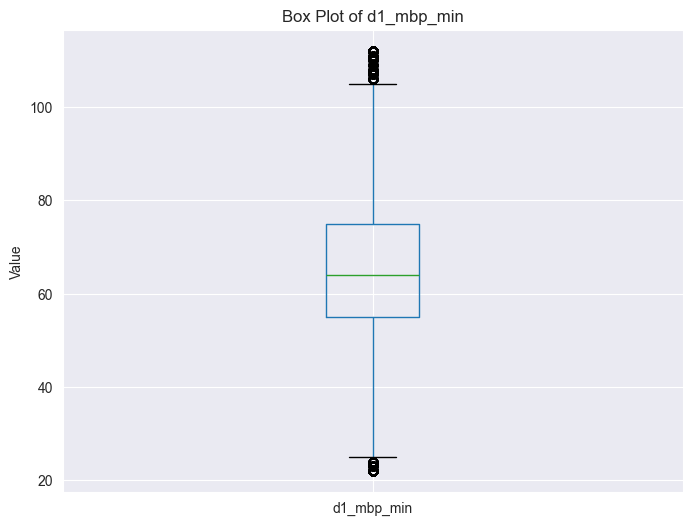

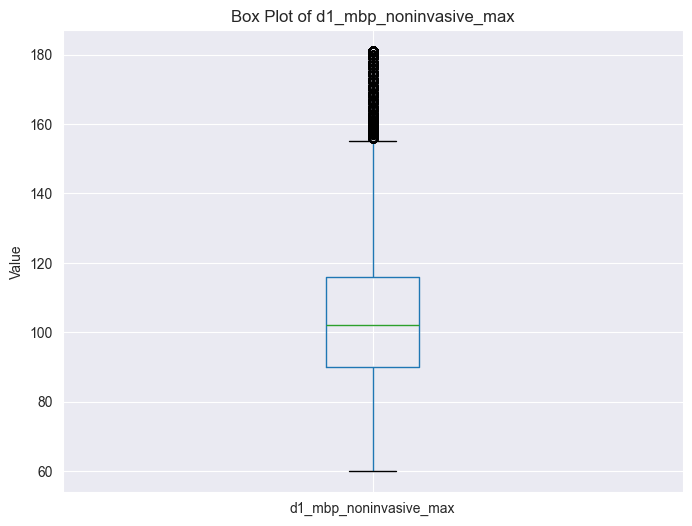

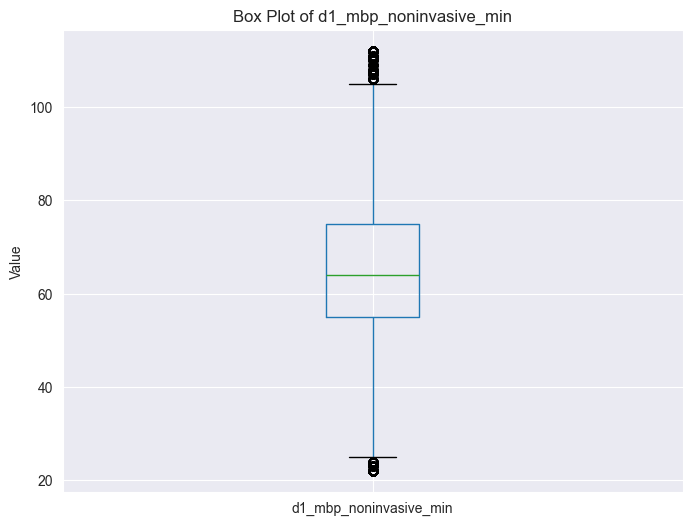

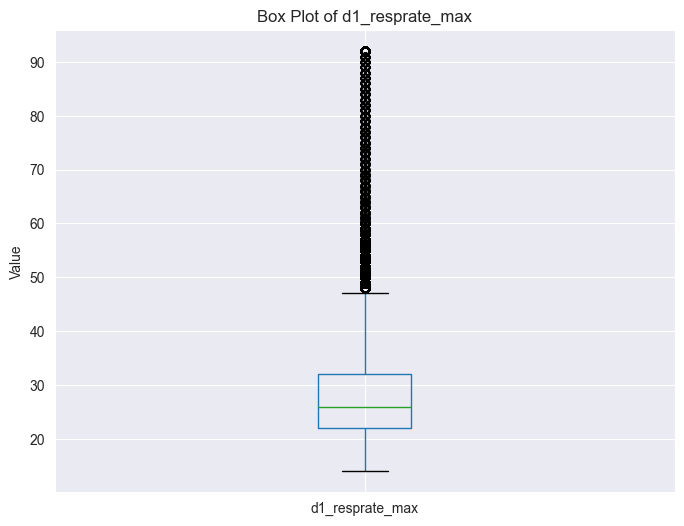

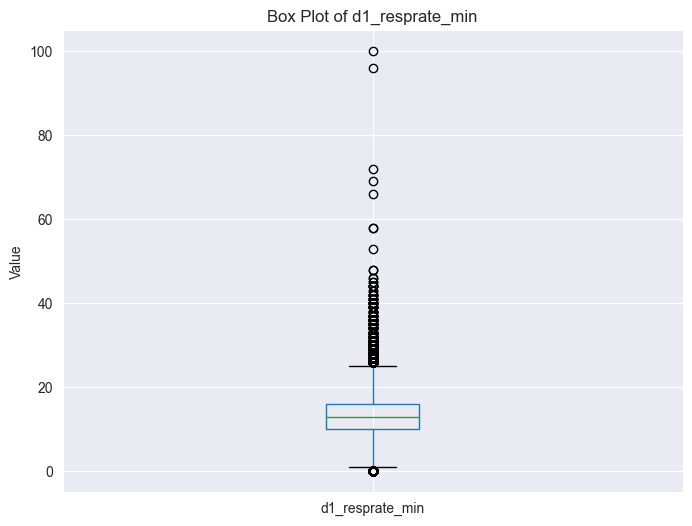

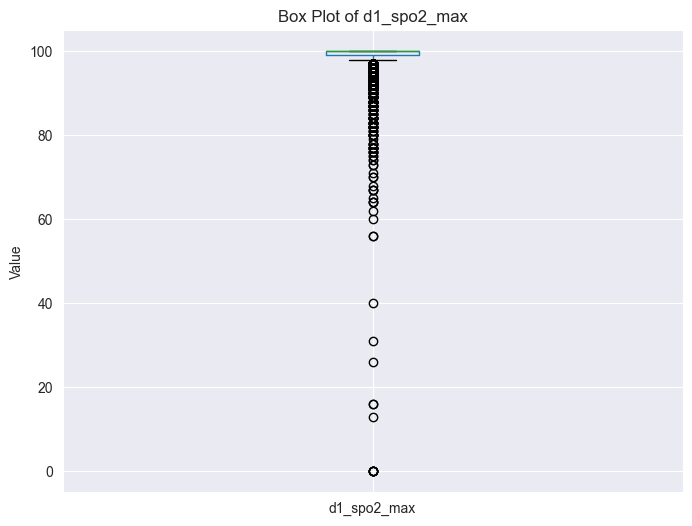

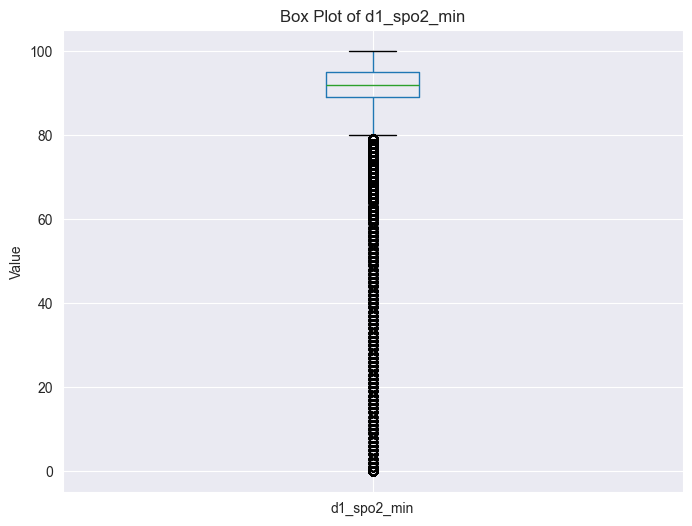

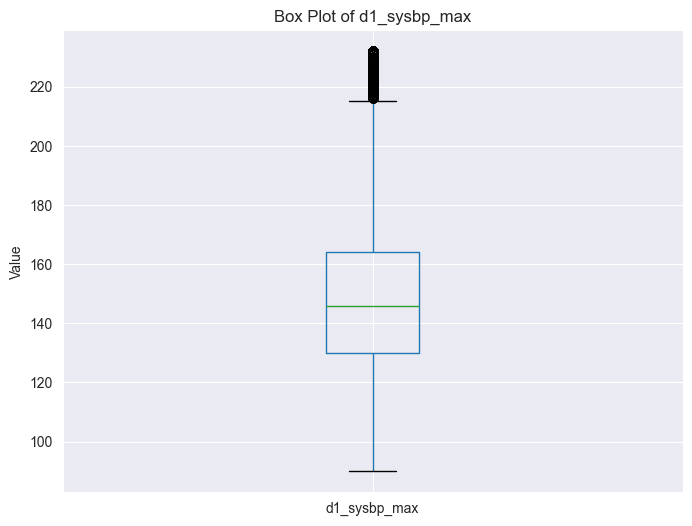

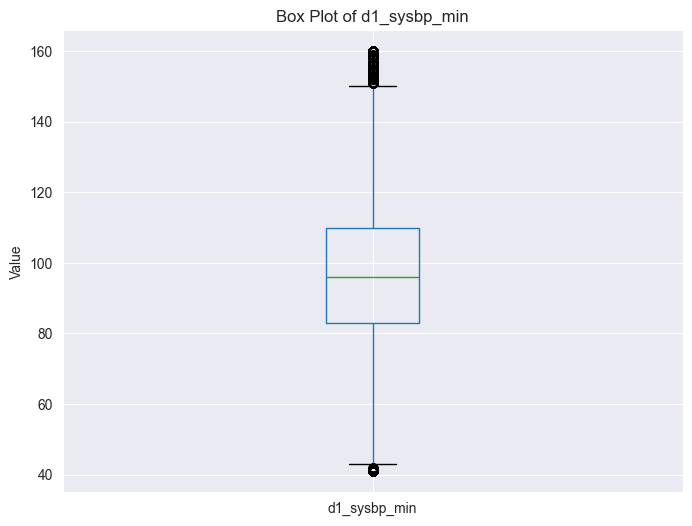

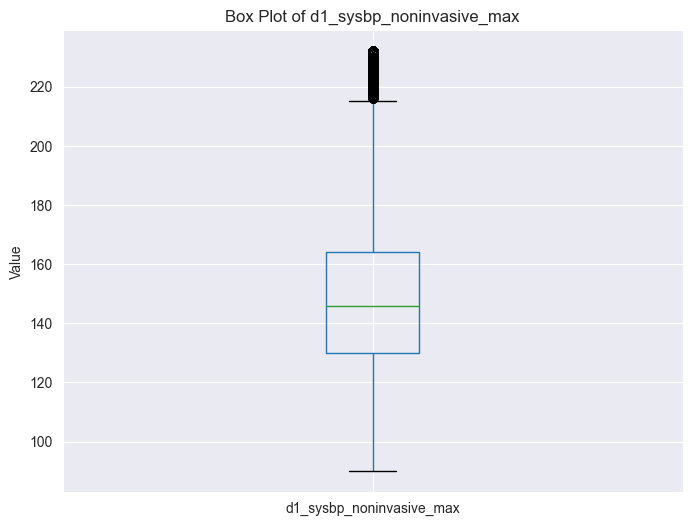

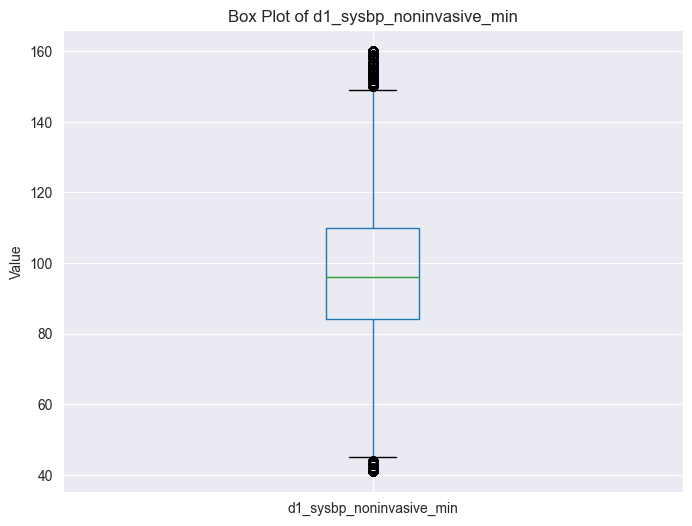

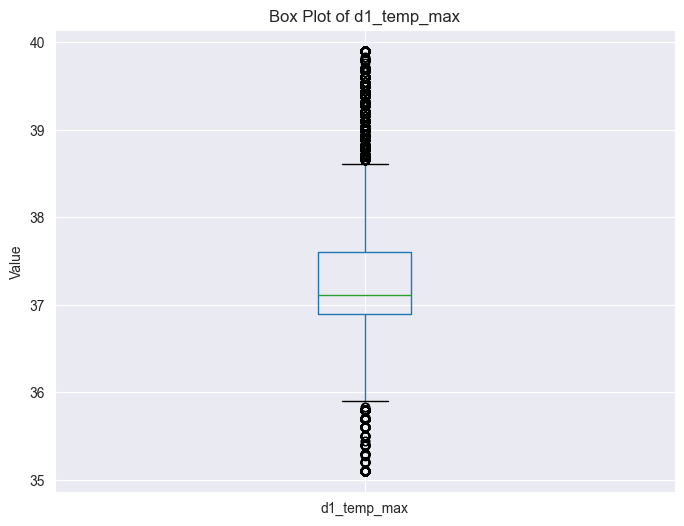

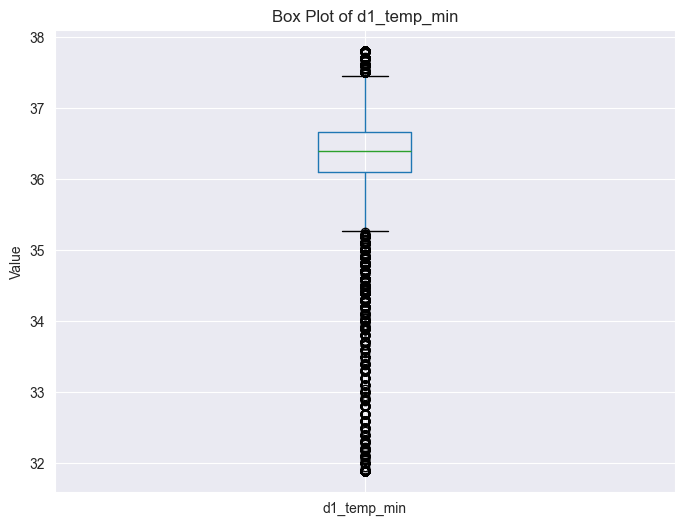

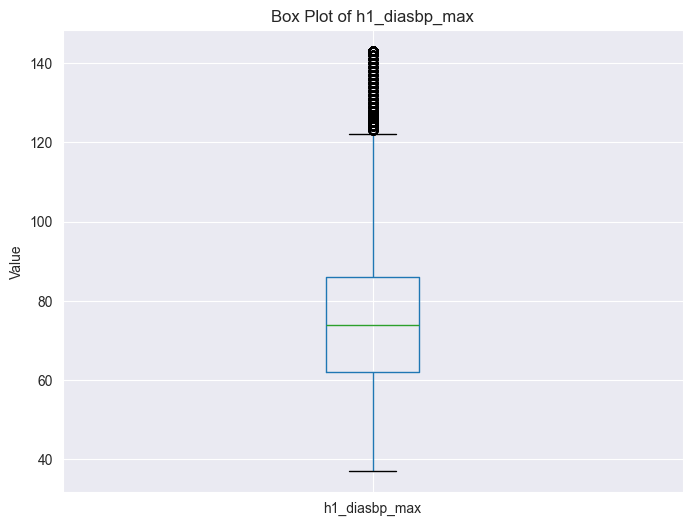

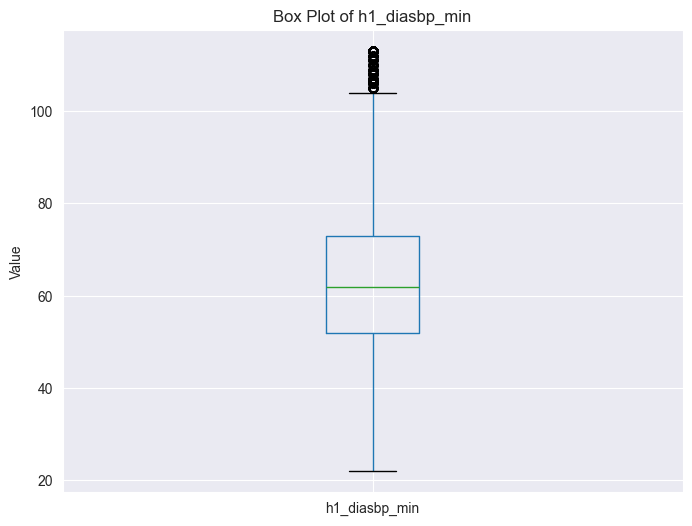

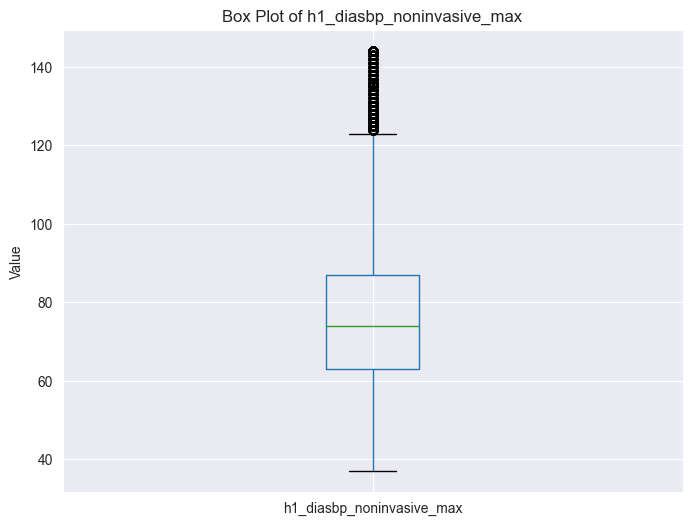

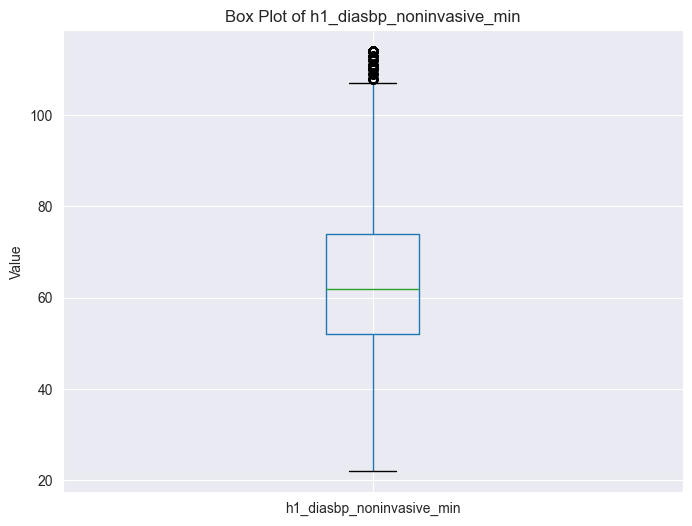

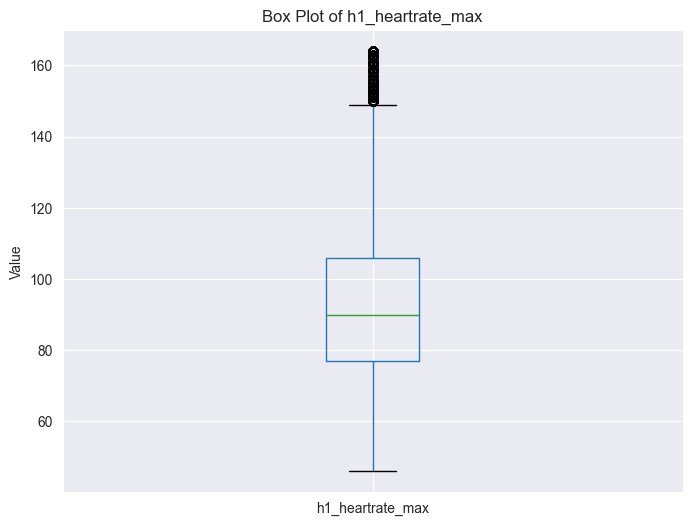

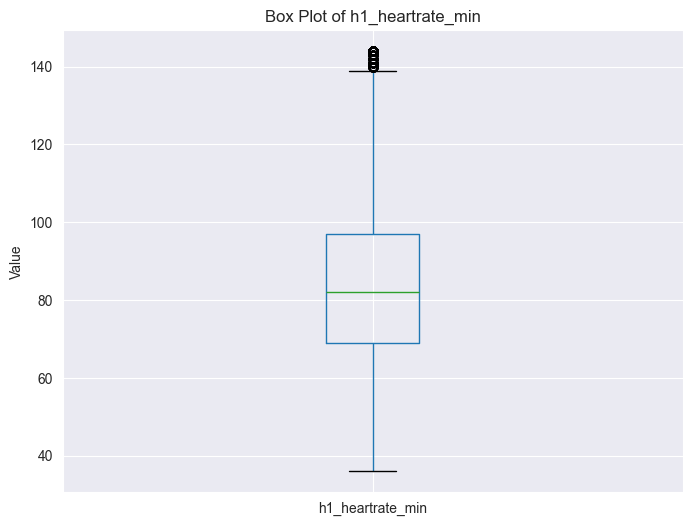

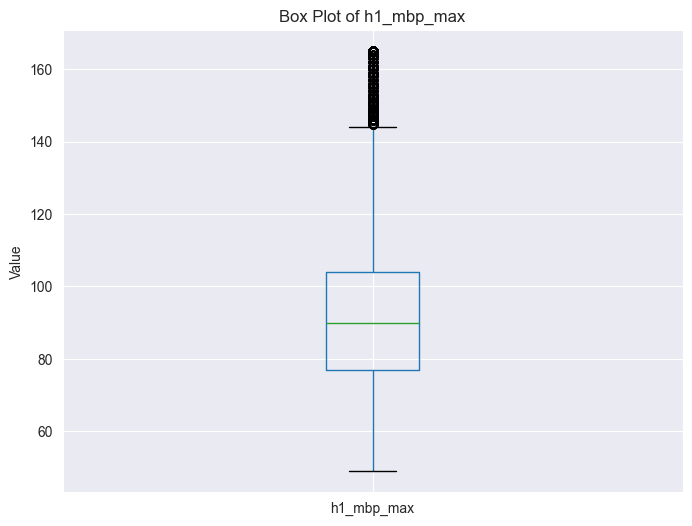

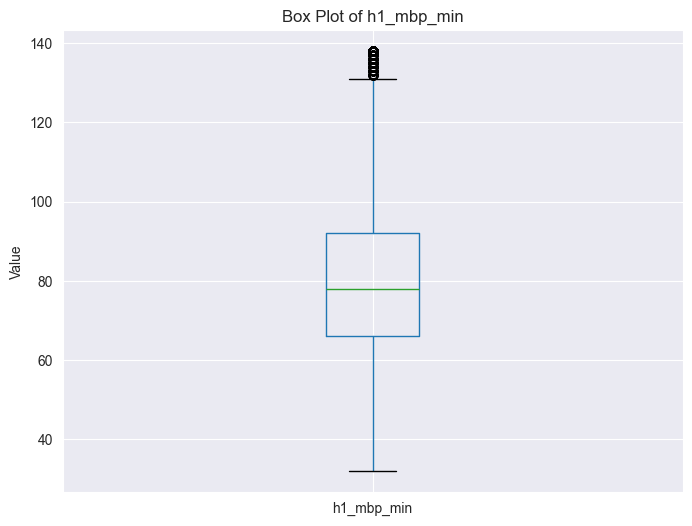

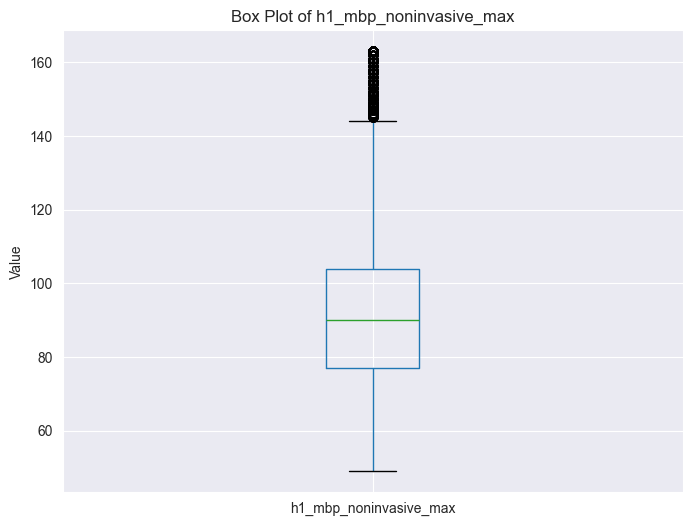

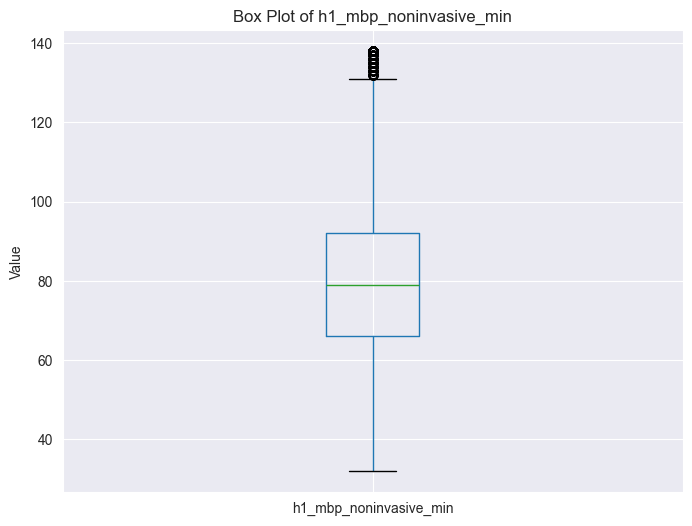

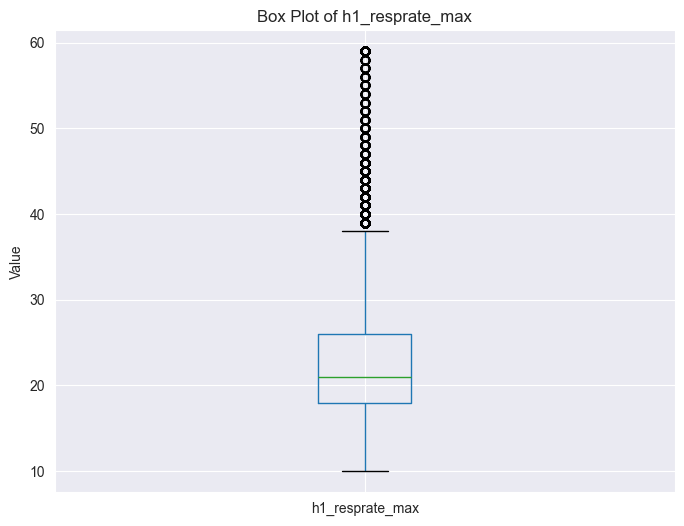

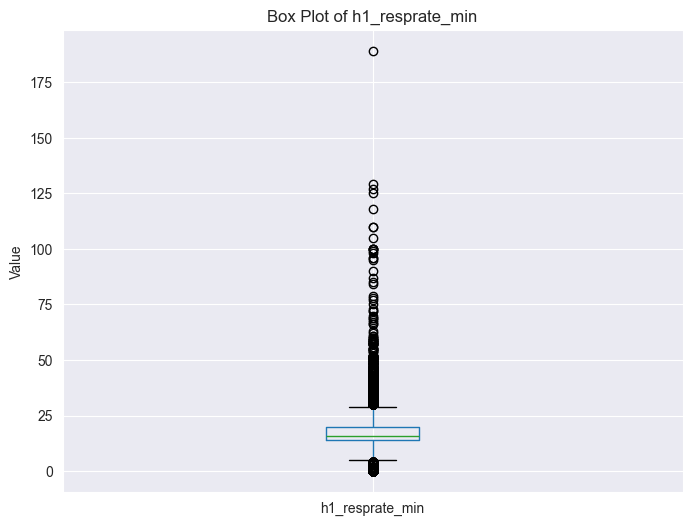

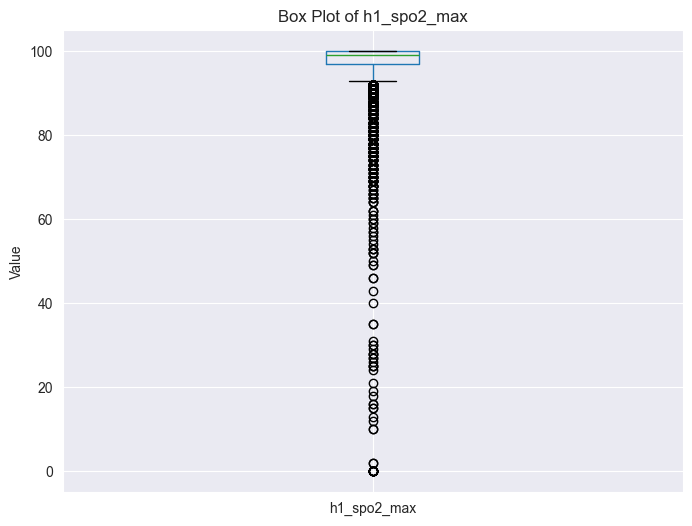

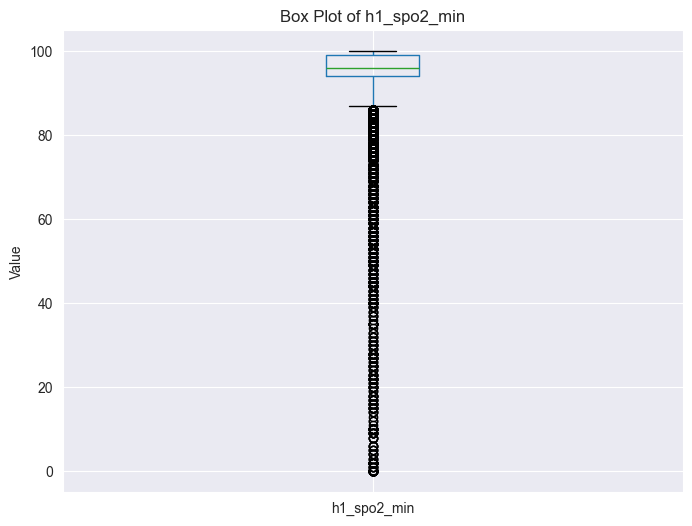

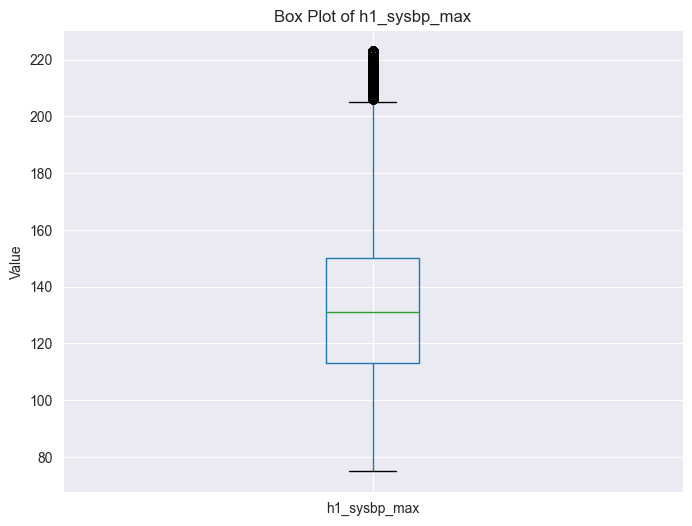

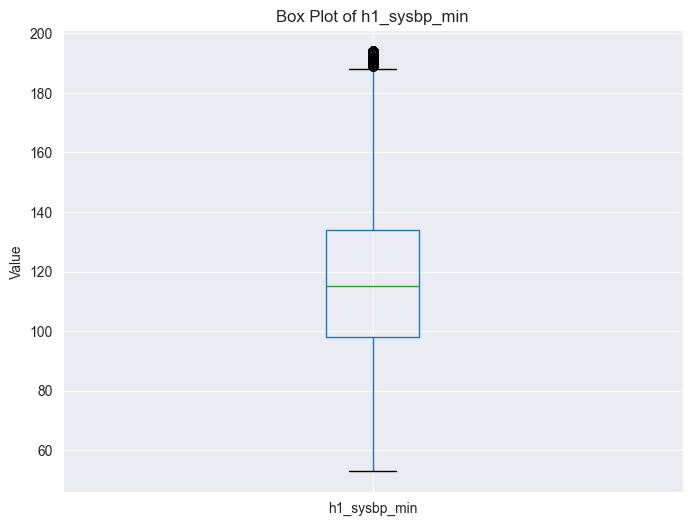

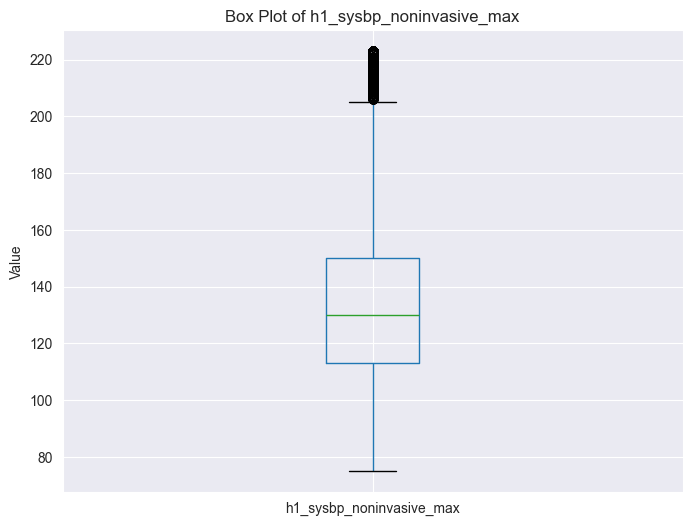

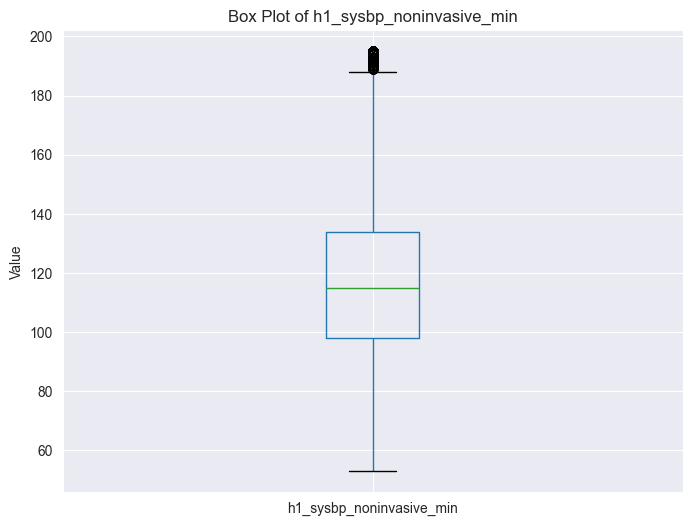

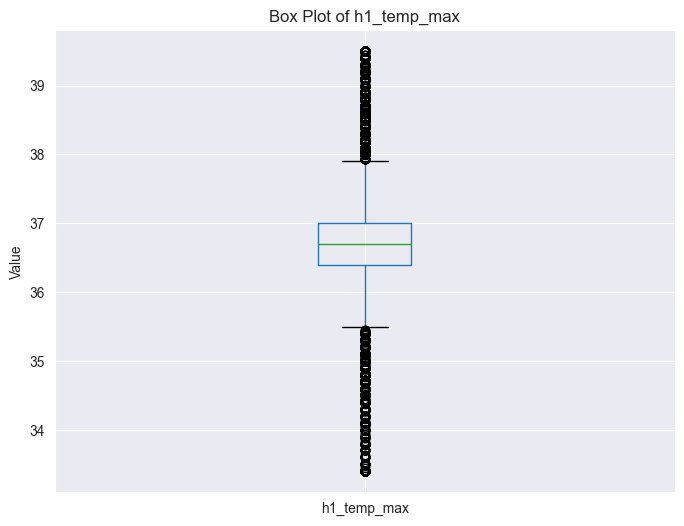

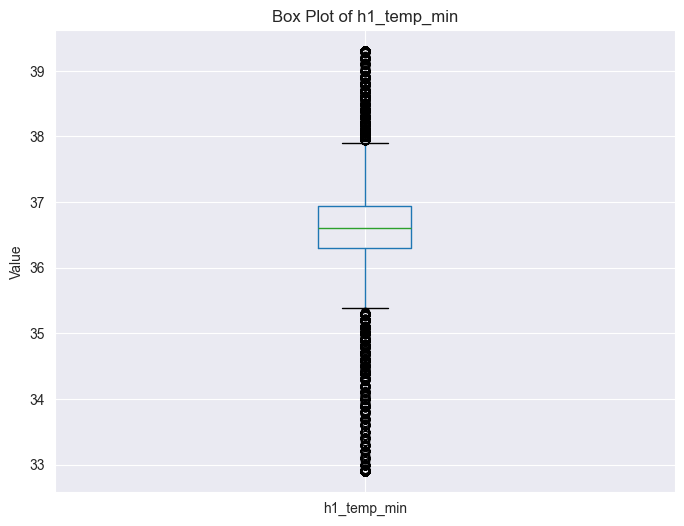

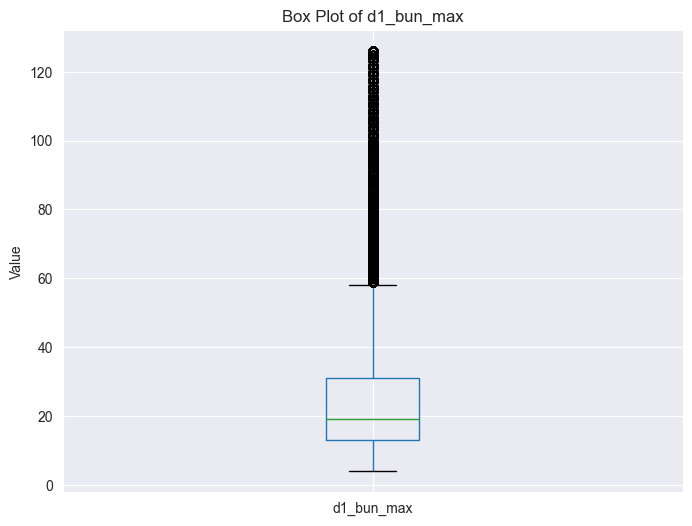

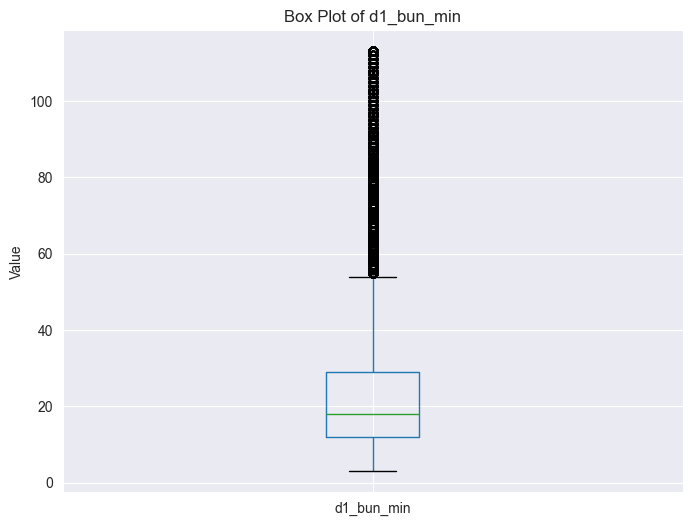

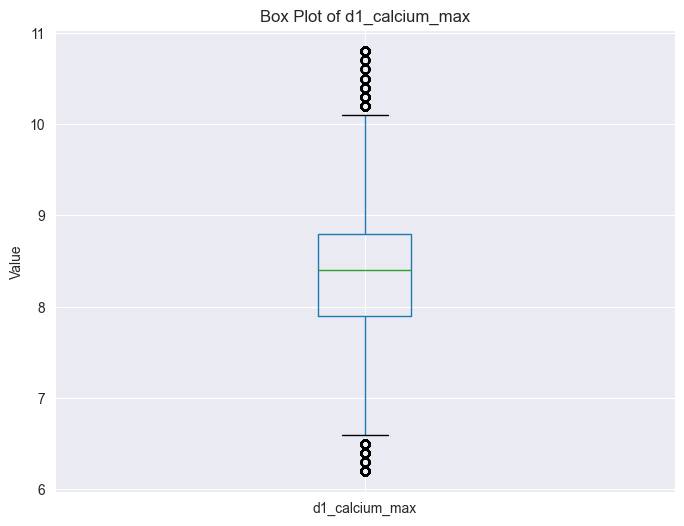

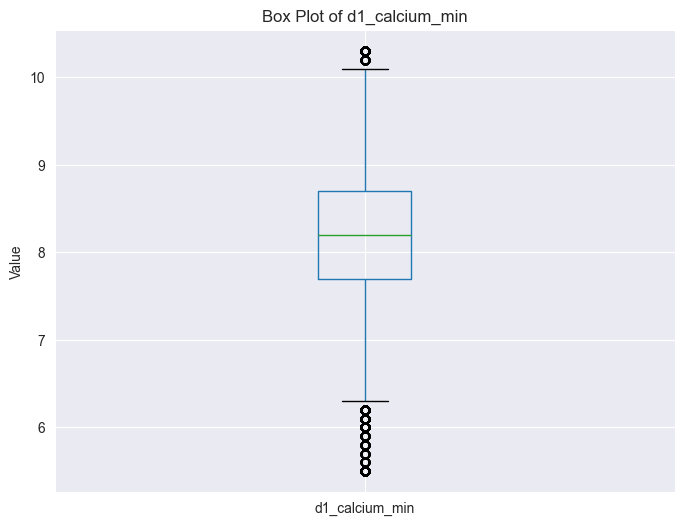

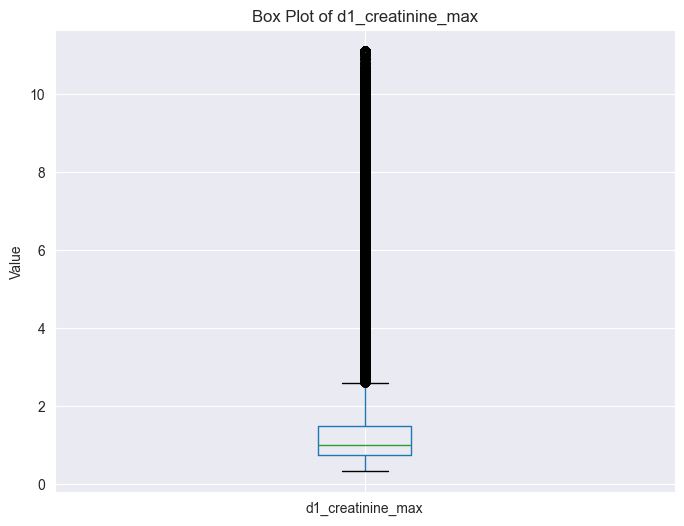

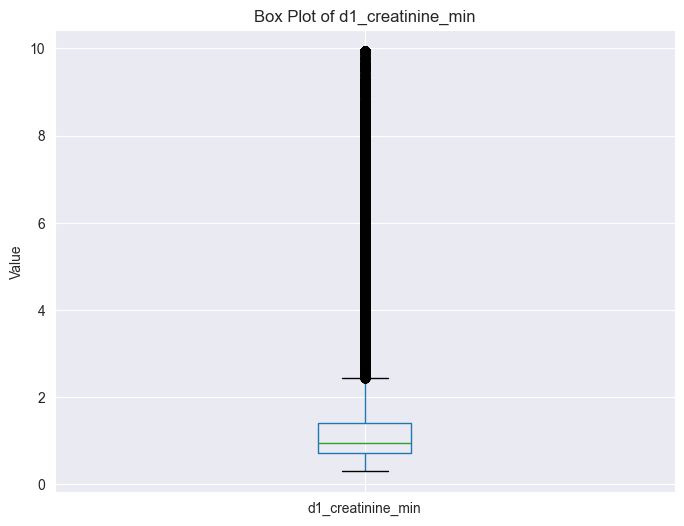

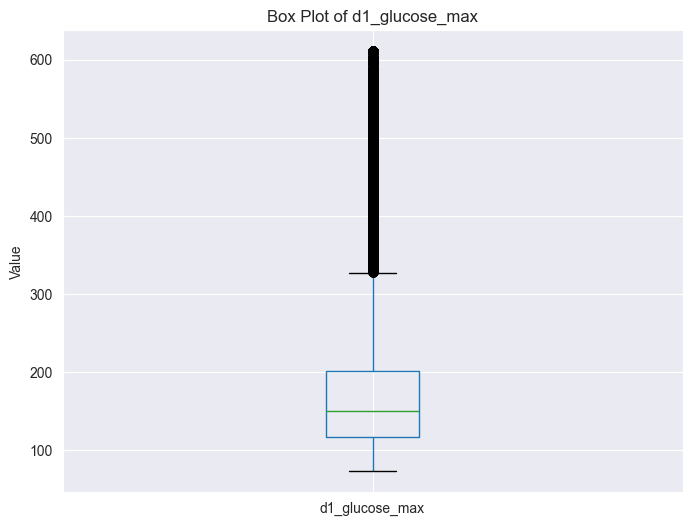

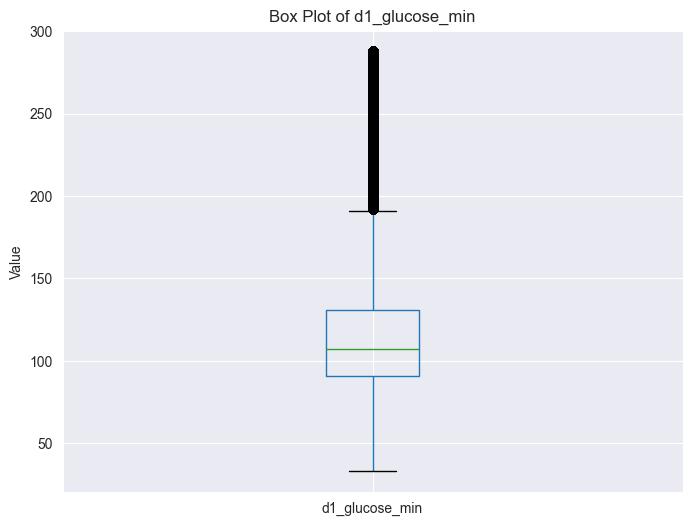

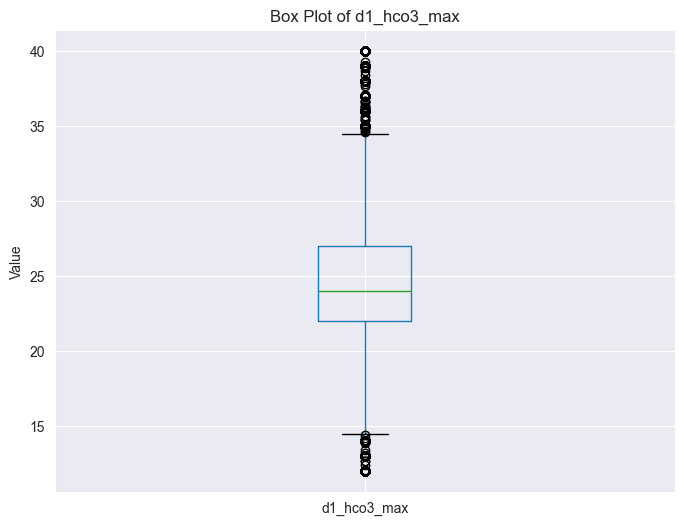

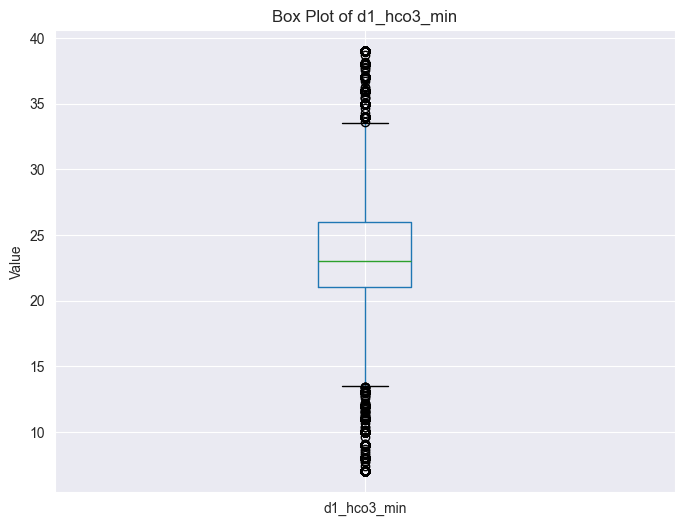

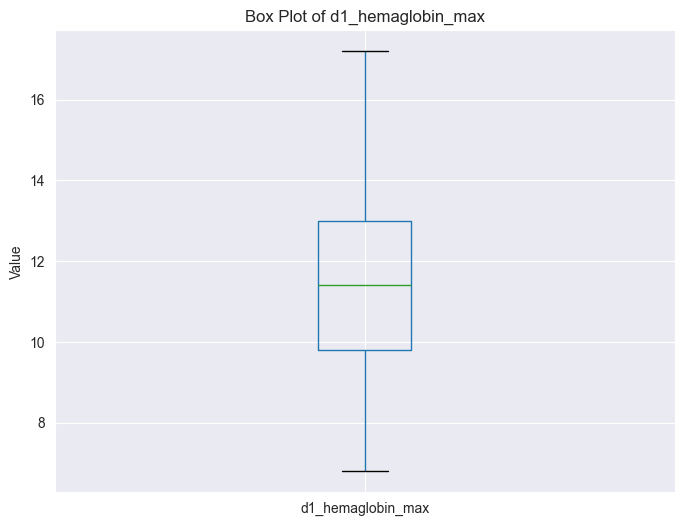

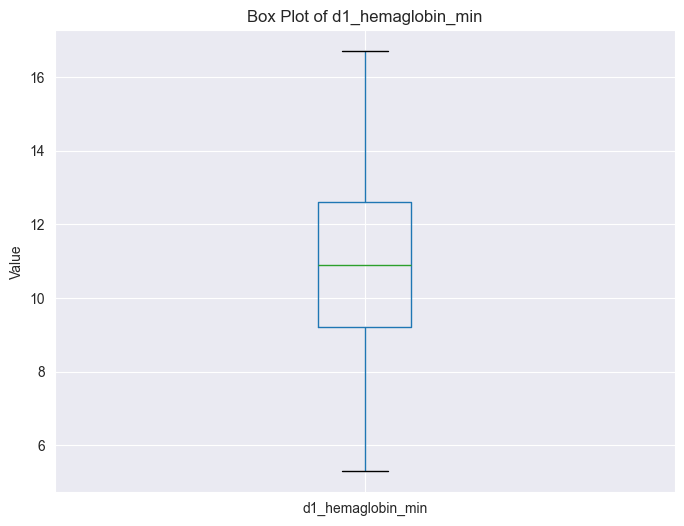

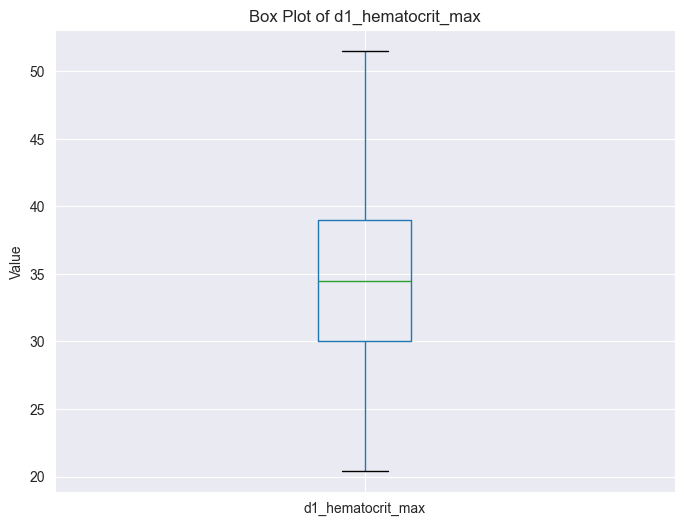

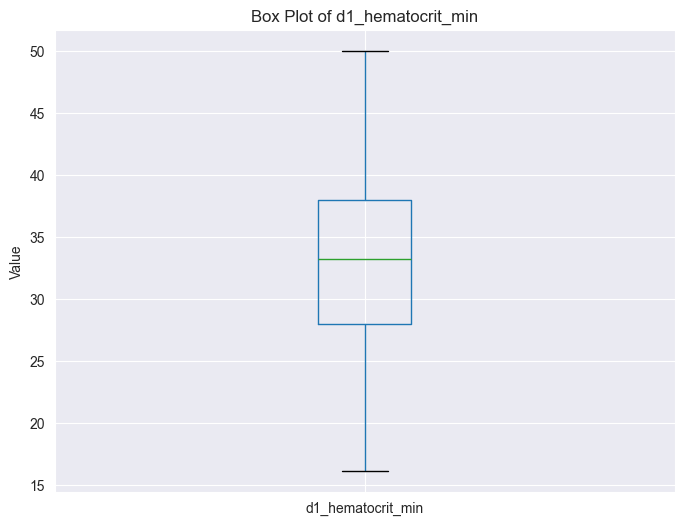

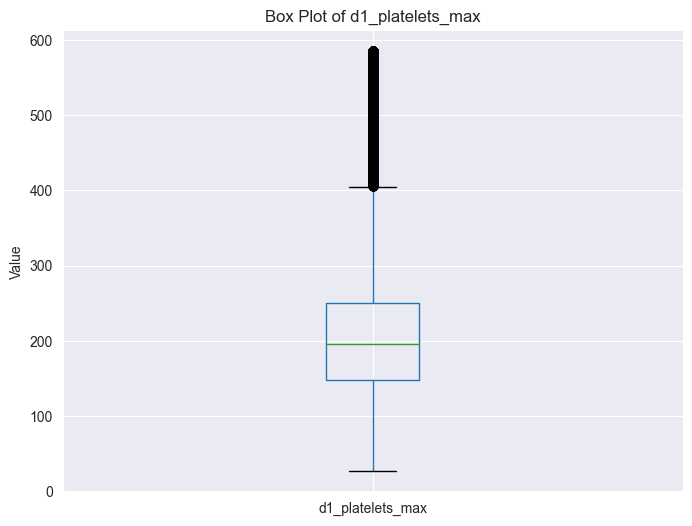

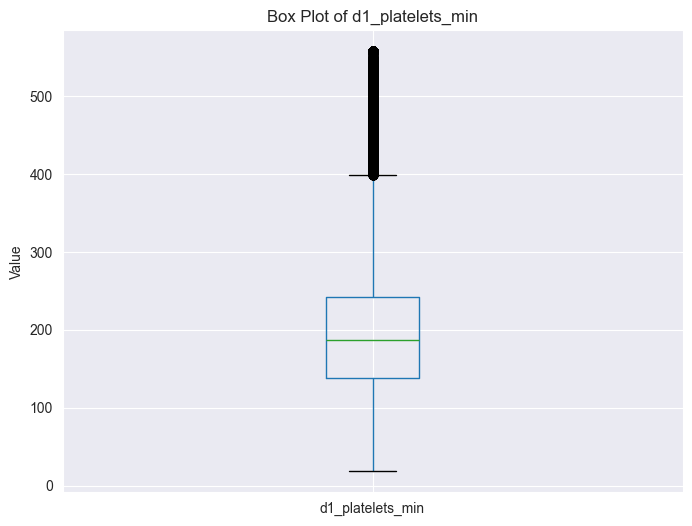

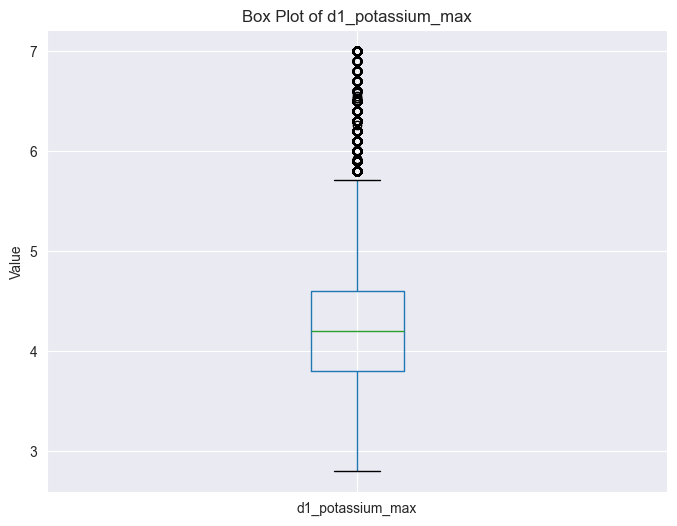

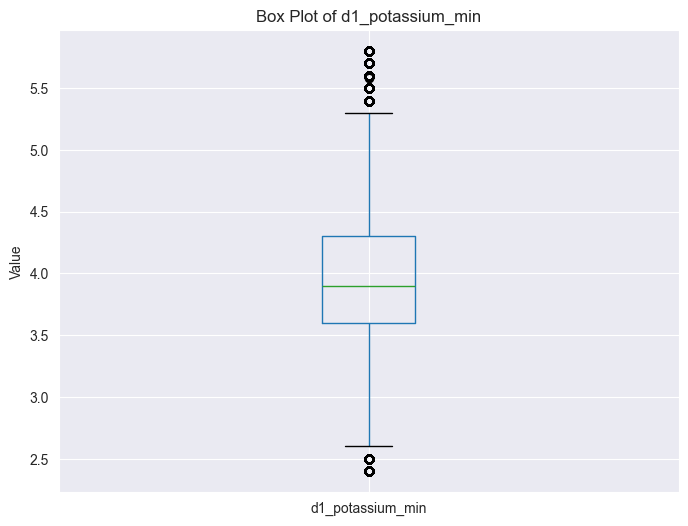

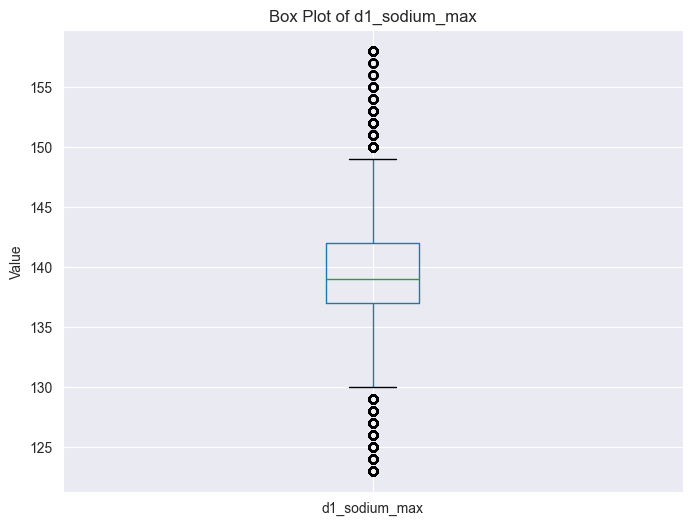

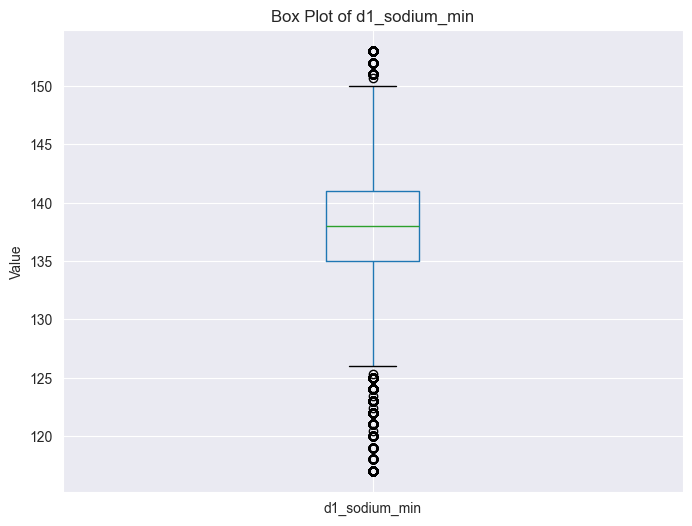

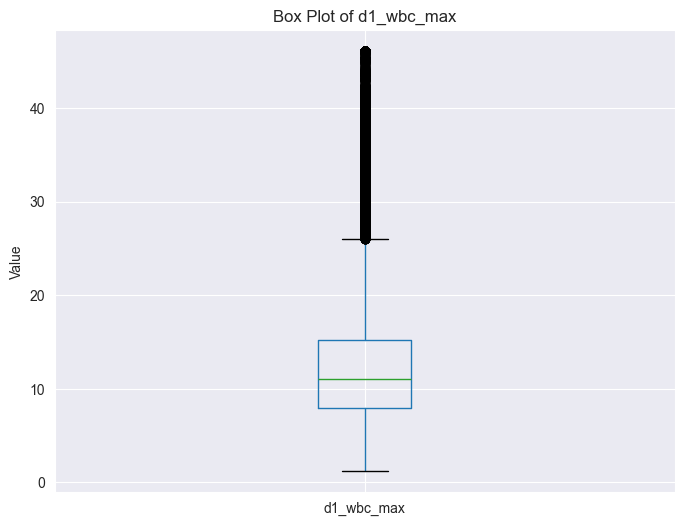

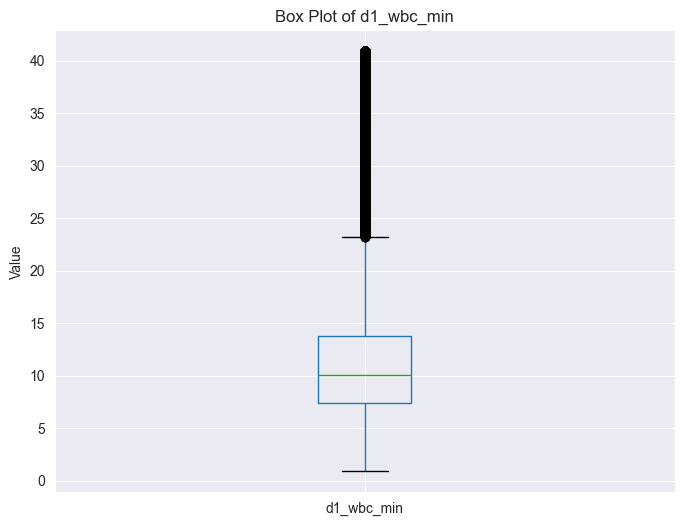

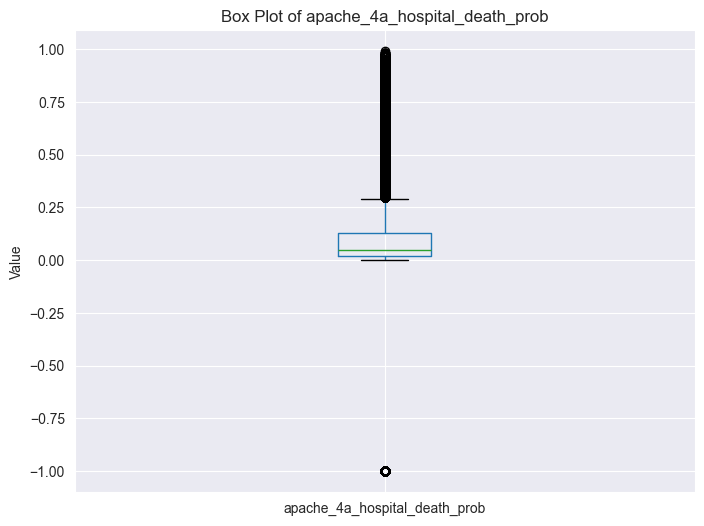

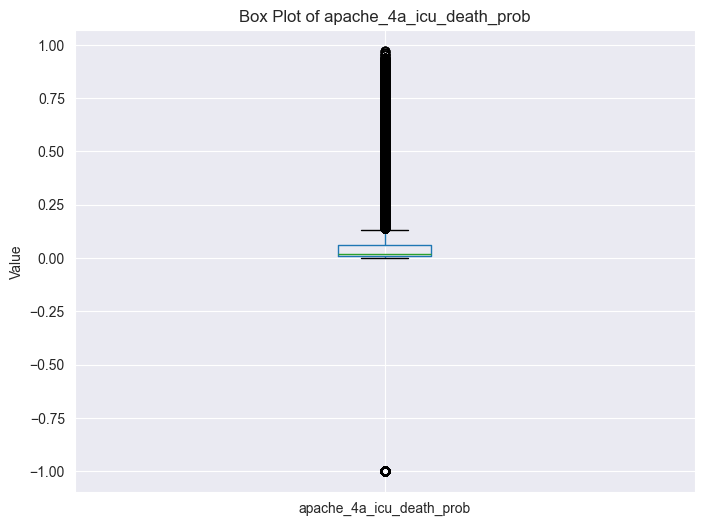

In [30]:
numeric_columns = df_dropped.select_dtypes(include=['int', 'float']).columns

filtered_columns = [col for col in numeric_columns if len(df_dropped[col].unique()) > 3 and not col.endswith('_id')]

for column in filtered_columns:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Value')
    plt.show()

# Imputing Categorical Columns with Mode Imputation

In [37]:
Categorical = []
for cols in df_dropped.columns:
    if df_dropped[cols].dtype == 'object':
        Categorical.append(cols)


In [38]:
imputer = SimpleImputer(strategy='most_frequent')
for column in Categorical:
    df_dropped[column] = imputer.fit_transform(df_dropped[column].values.reshape(-1, 1)).flatten()

In [39]:
df_dropped

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,170.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,0,NaN,23.297481,0,Caucasian,F,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


# Dividing Categorical and Numerical Features
#### The reason to divide the categorical and Numerical Features is to pass the numerical feature to Multiple Imputation by Chained Equation

In [41]:
Categorical_copy = pd.DataFrame()
for cols in Categorical:
    Categorical_copy[cols] = df_dropped[cols]
    df_dropped = df_dropped.drop([cols],axis=1)

In [51]:
Categorical_copy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ethnicity              91713 non-null  object
 1   gender                 91713 non-null  object
 2   hospital_admit_source  91713 non-null  object
 3   icu_admit_source       91713 non-null  object
 4   icu_stay_type          91713 non-null  object
 5   icu_type               91713 non-null  object
 6   apache_3j_bodysystem   91713 non-null  object
 7   apache_2_bodysystem    91713 non-null  object
dtypes: object(8)
memory usage: 5.6+ MB


# Multiple Imputation by Chained Equation

In [42]:
df_copy = df_dropped.copy()

# Create a mask of missing values
missing_mask = df_copy.isna()

# Initialize an IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit the imputer and transform the data
imputed_values = imputer.fit_transform(df_copy)

# Convert the imputed values array back to a DataFrame
imputed_df = pd.DataFrame(imputed_values, columns=df_copy.columns, index=df_copy.index)

# Assign the imputed values to the missing values in df_copy
df_copy[missing_mask] = imputed_df[missing_mask]

In [50]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 104 entries, encounter_id to solid_tumor_with_metastasis
dtypes: float64(96), int64(8)
memory usage: 72.8 MB


In [52]:
Df_Patients = pd.concat([Categorical_copy, df_copy], axis=1)

In [53]:
Df_Patients

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem,encounter_id,patient_id,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,Caucasian,M,Floor,Floor,admit,CTICU,Sepsis,Cardiovascular,66154,25312,...,0.100000,0.050000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,Respiratory,Respiratory,114252,59342,...,0.470000,0.290000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic,119783,50777,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular,79267,46918,...,0.040000,0.030000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Caucasian,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma,92056,34377,...,-0.026035,-0.013603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,Caucasian,M,Acute Care/Floor,Floor,admit,Cardiac ICU,Sepsis,Cardiovascular,91592,78108,...,0.120000,0.050000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
91709,Caucasian,F,Emergency Department,Floor,admit,Med-Surg ICU,Sepsis,Cardiovascular,66119,13486,...,0.030000,0.020000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91710,Caucasian,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic,8981,58179,...,0.050000,0.020000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
91711,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Respiratory,Respiratory,33776,120598,...,0.070000,0.020000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Checking for Outliers on Imputed DataFrame

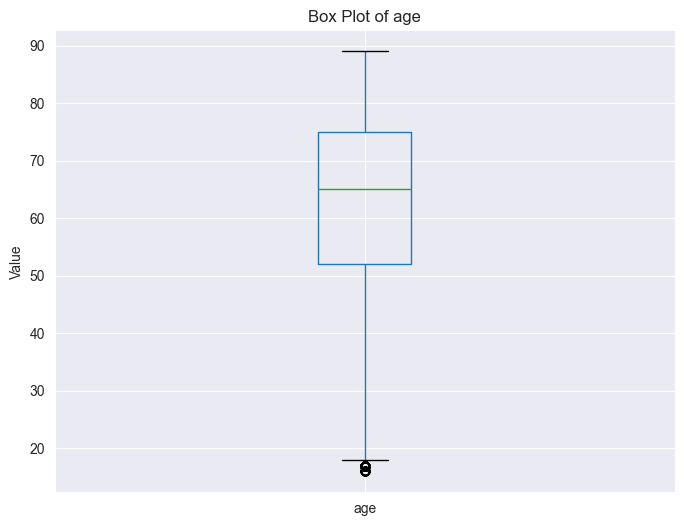

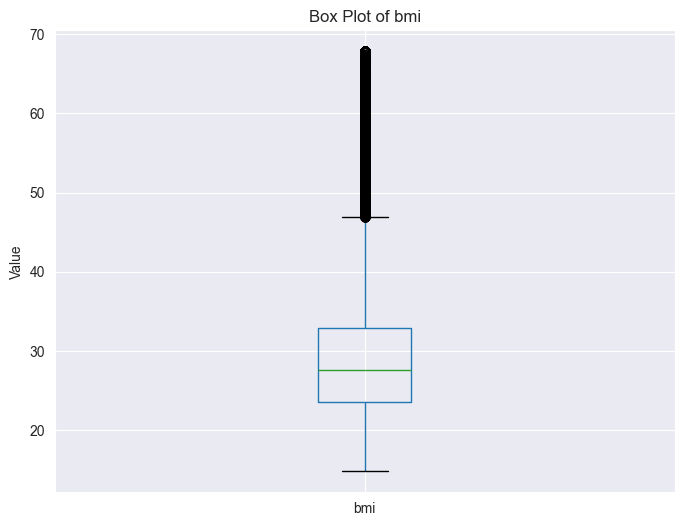

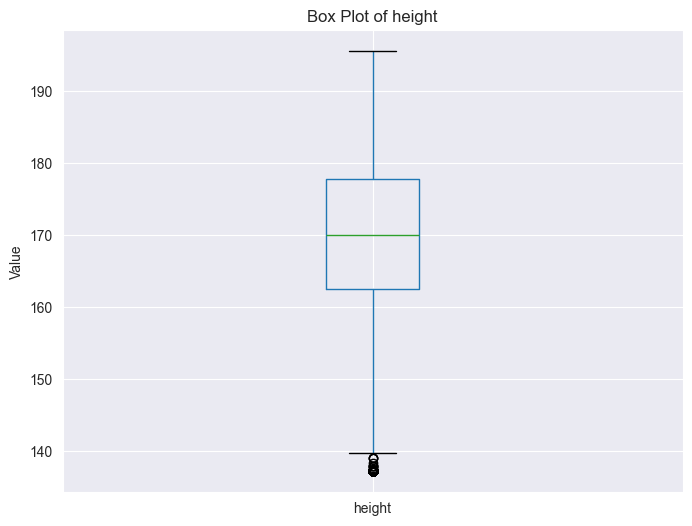

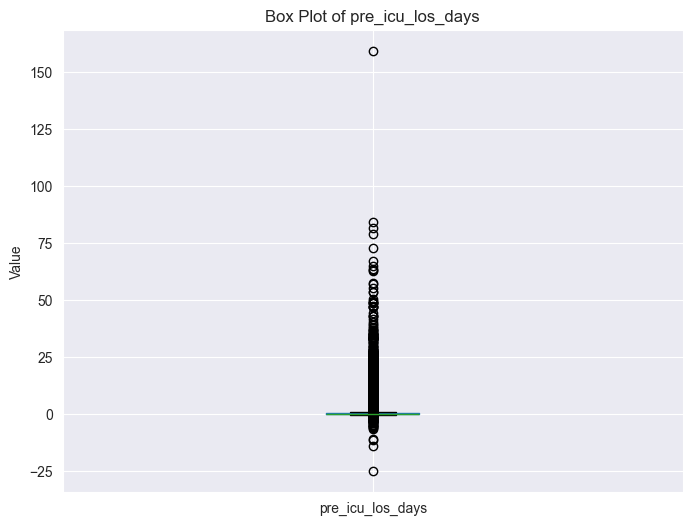

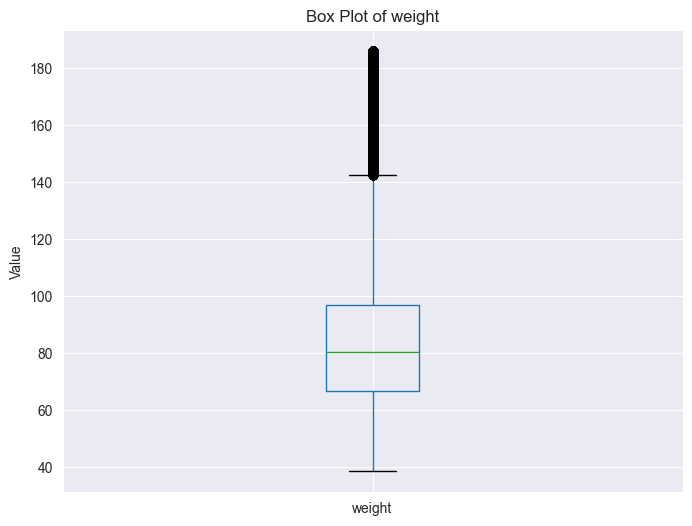

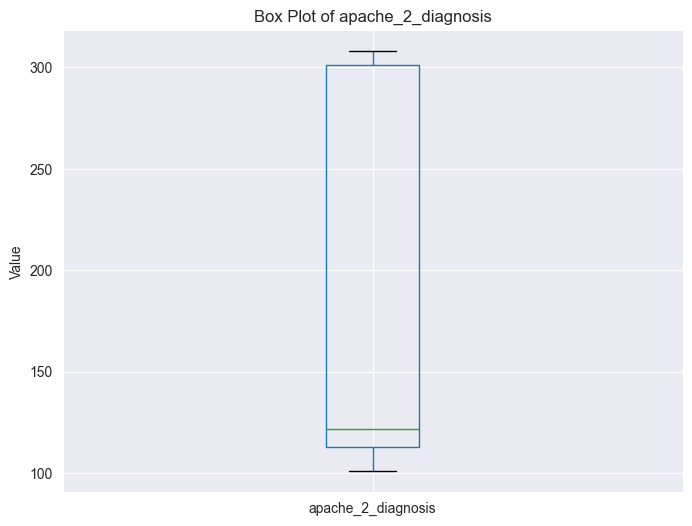

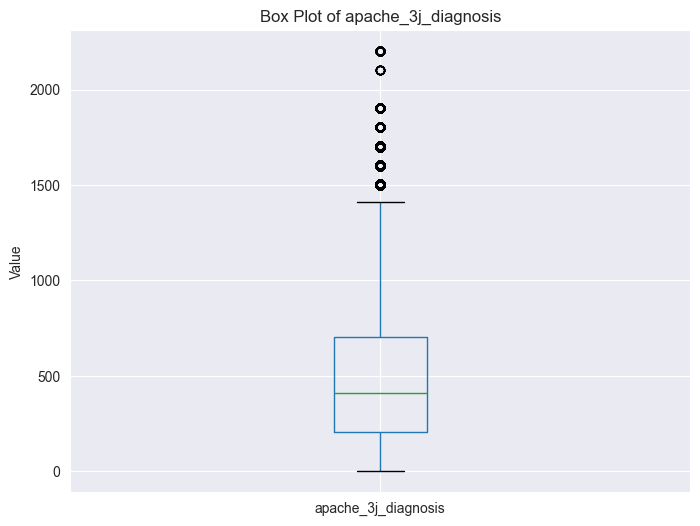

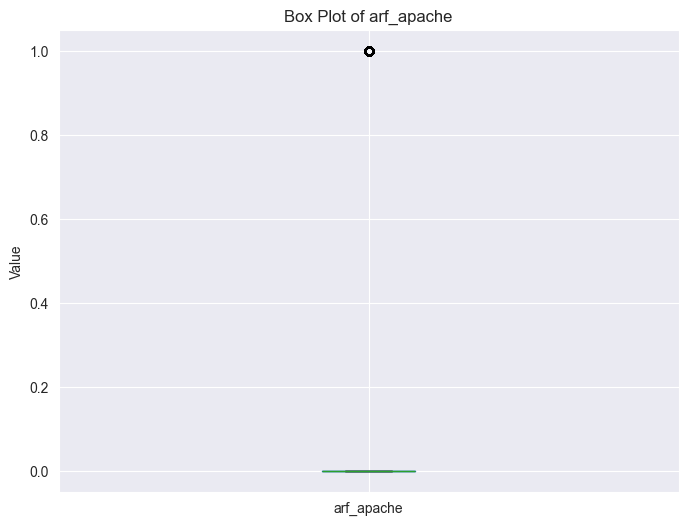

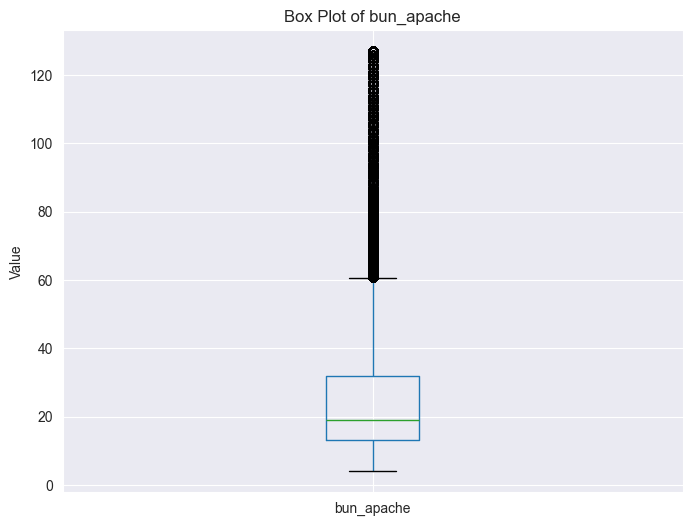

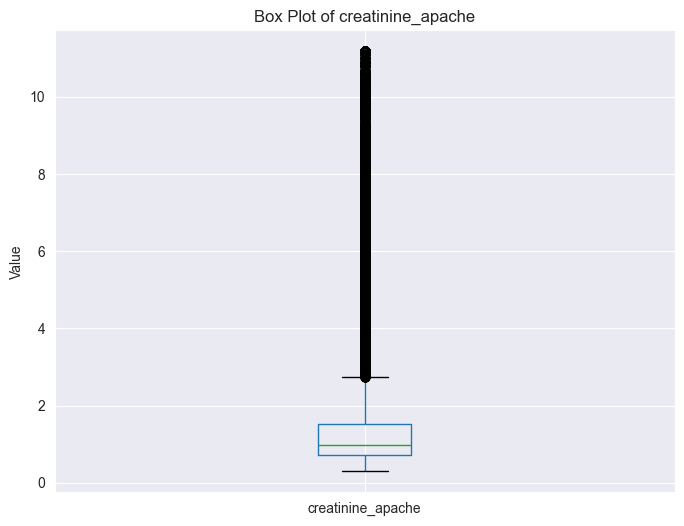

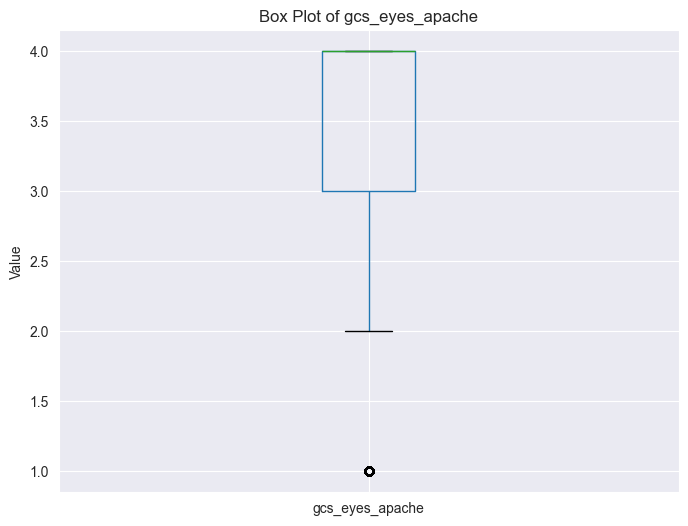

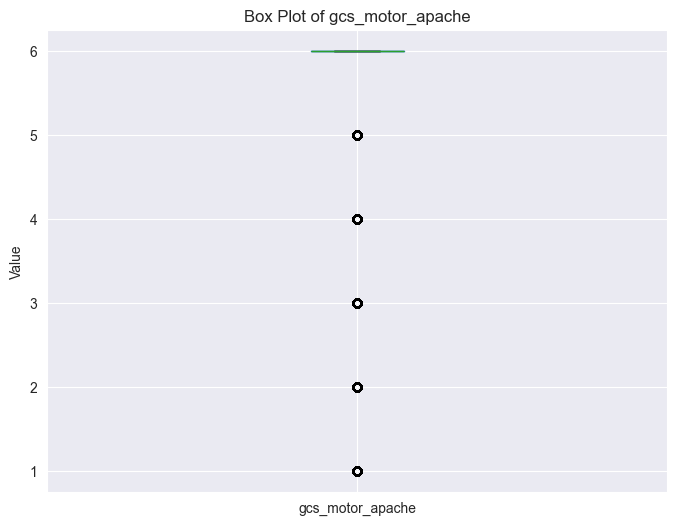

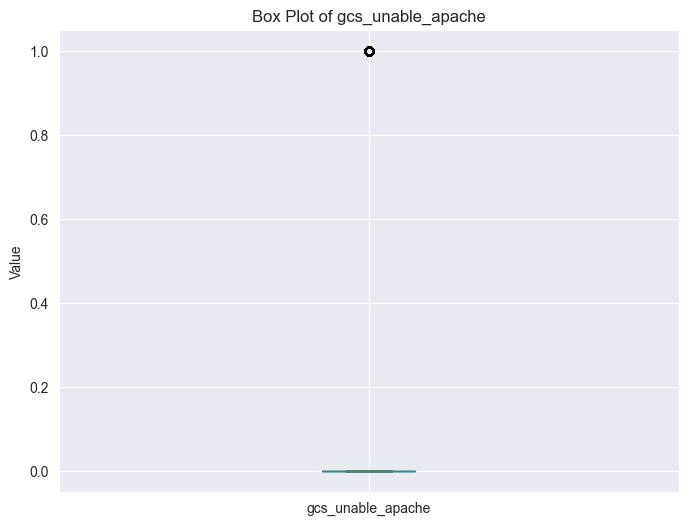

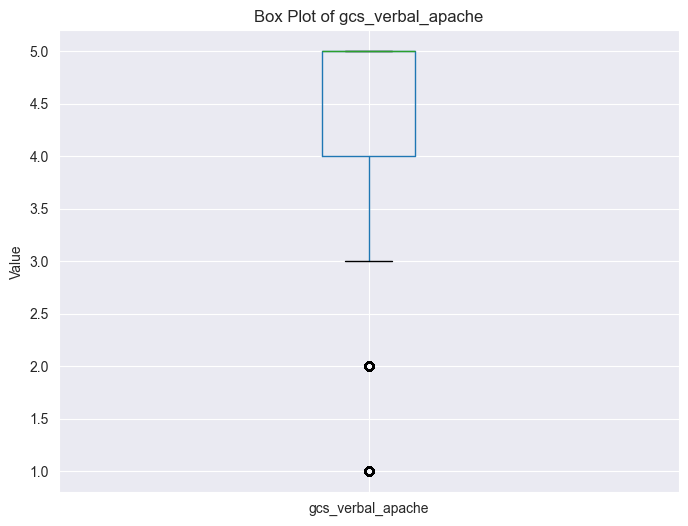

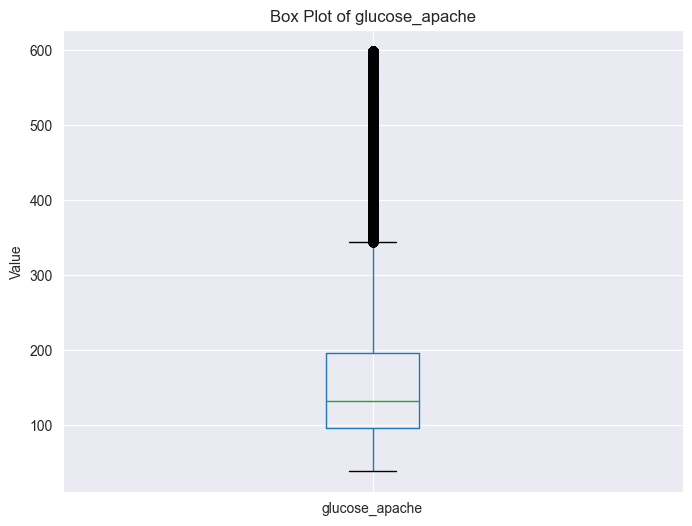

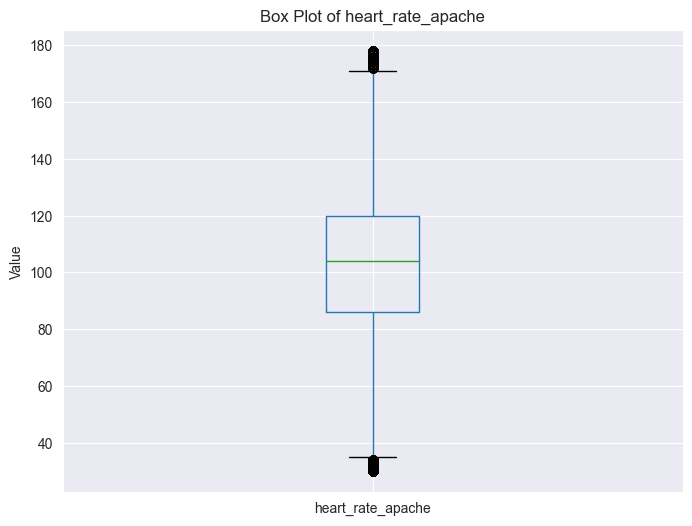

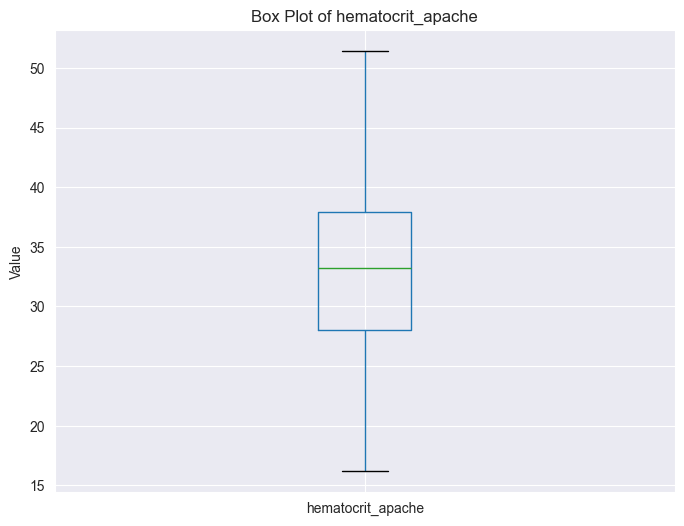

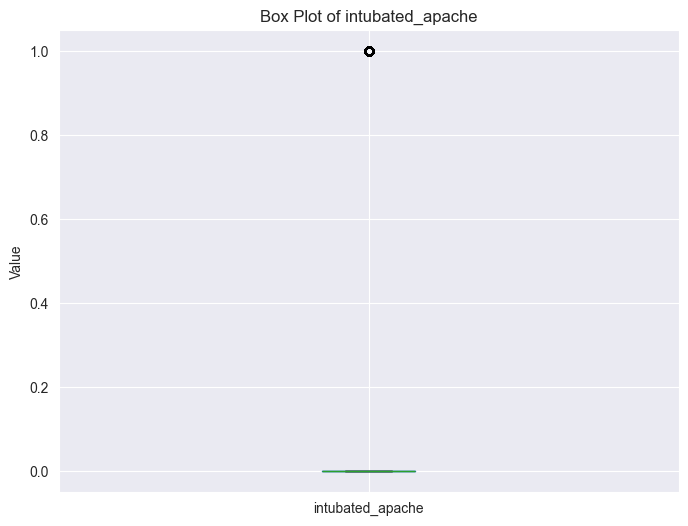

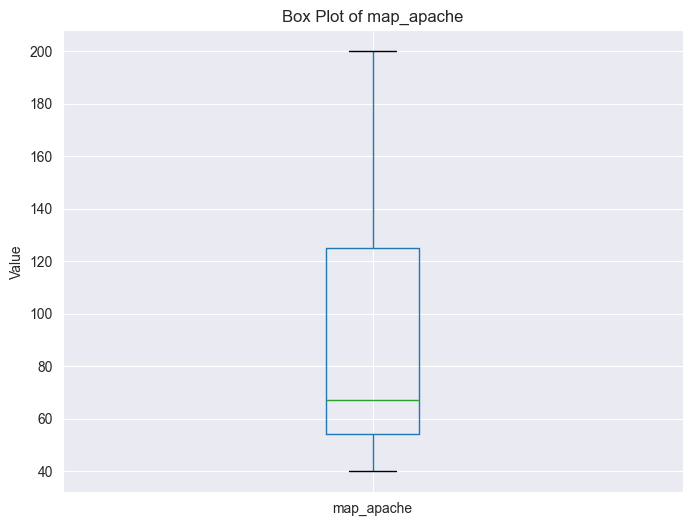

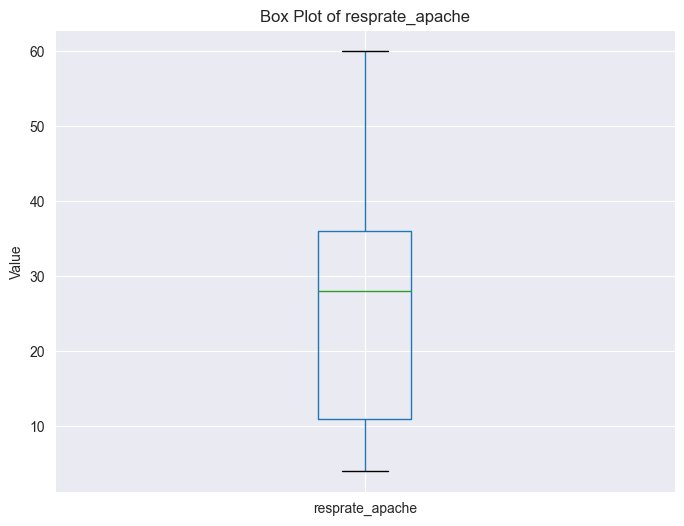

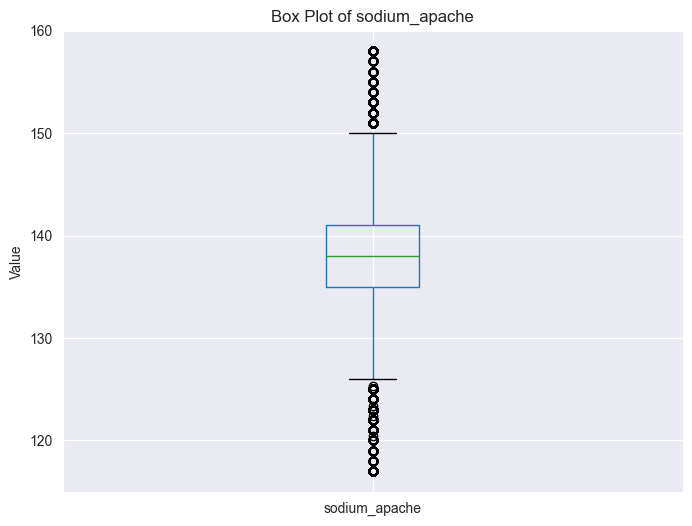

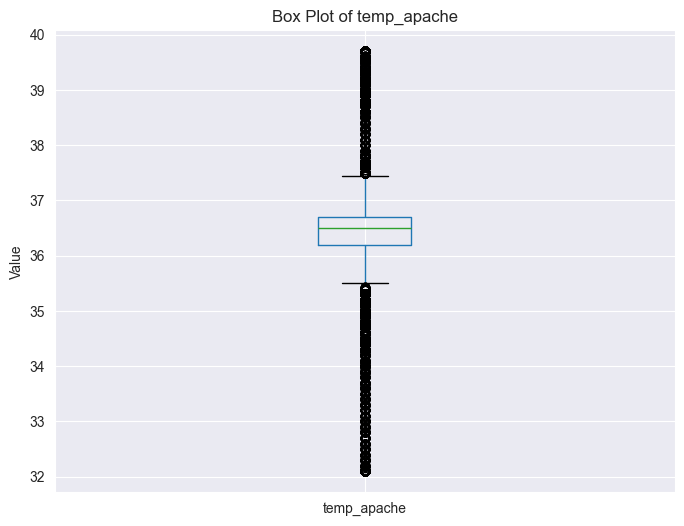

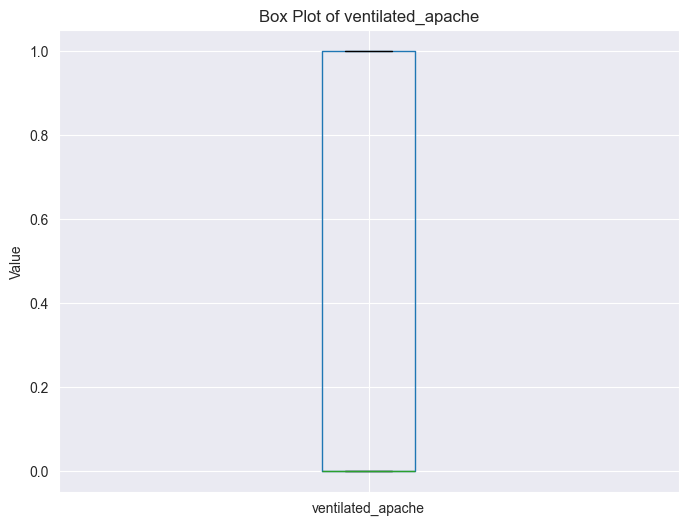

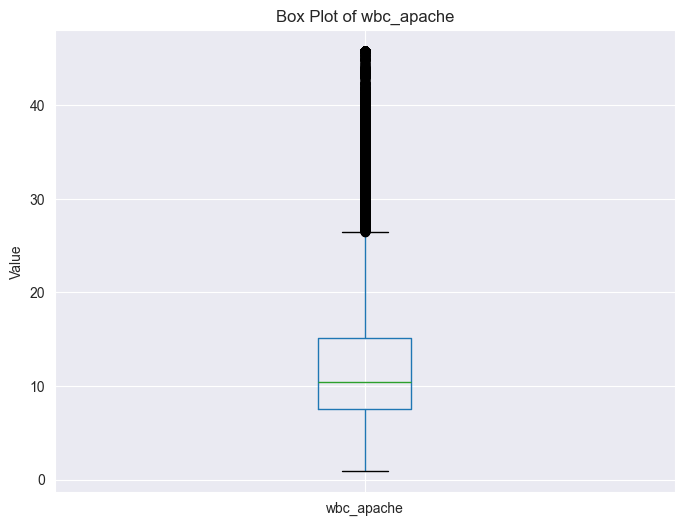

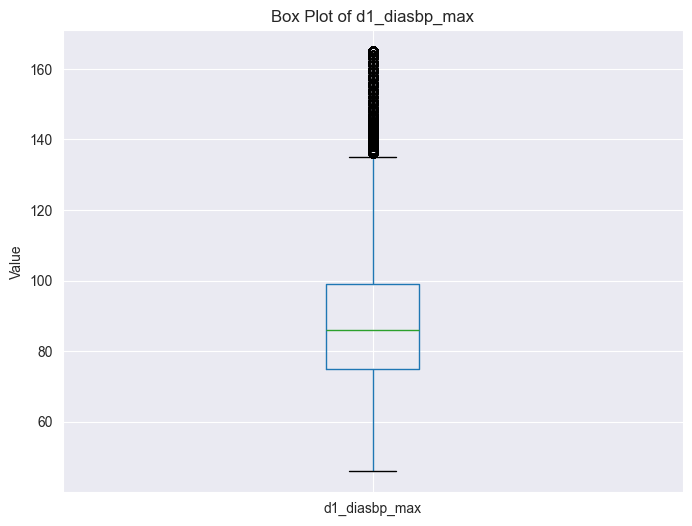

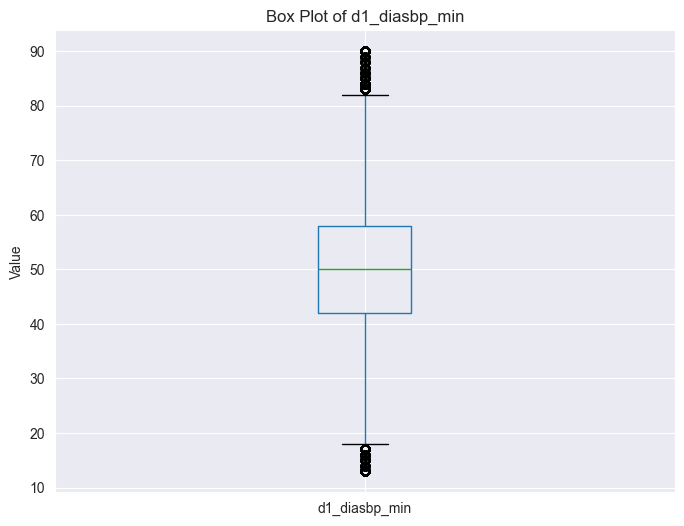

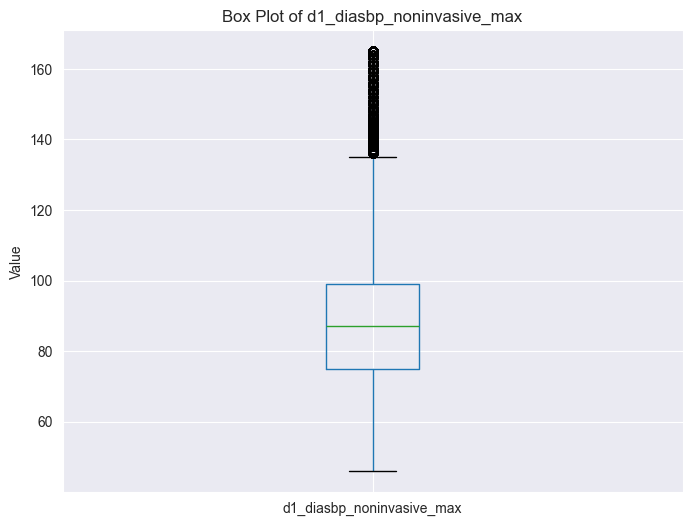

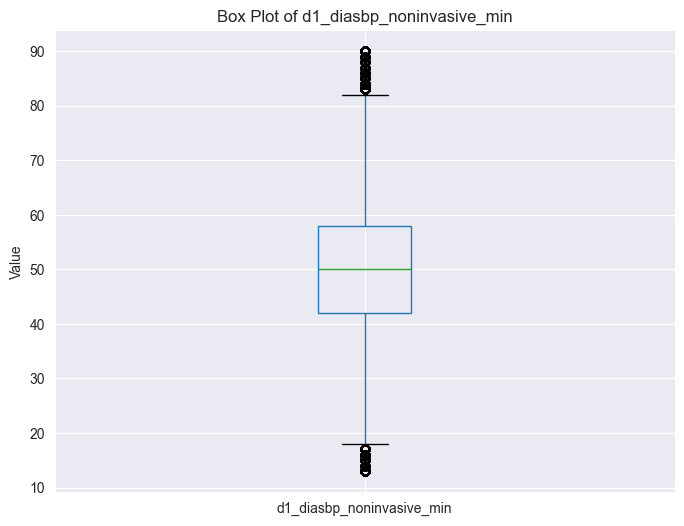

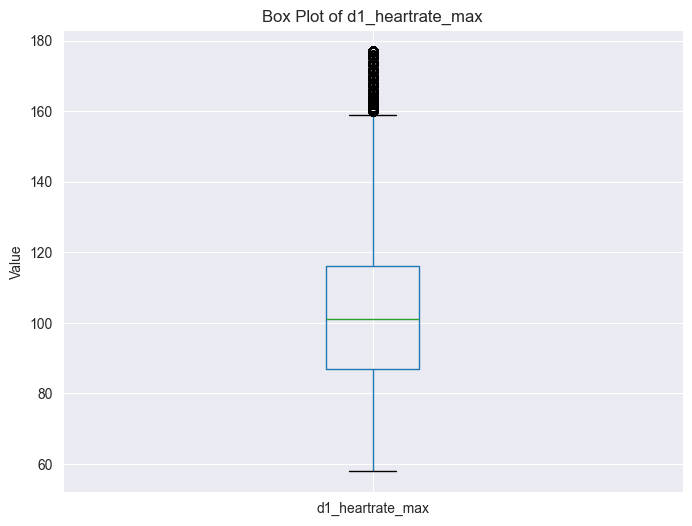

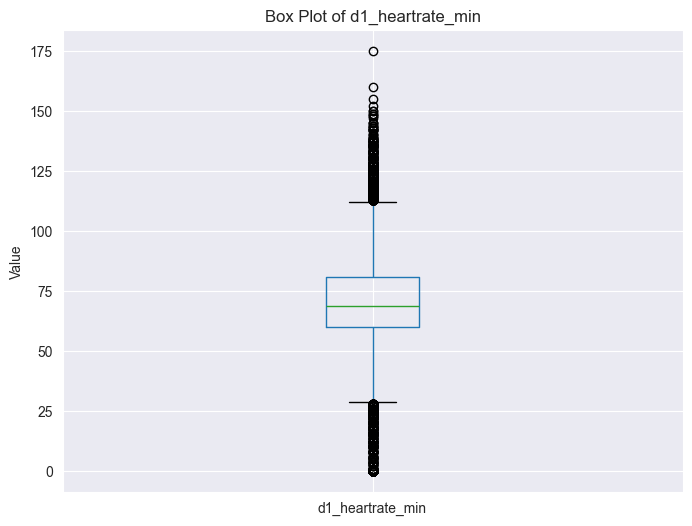

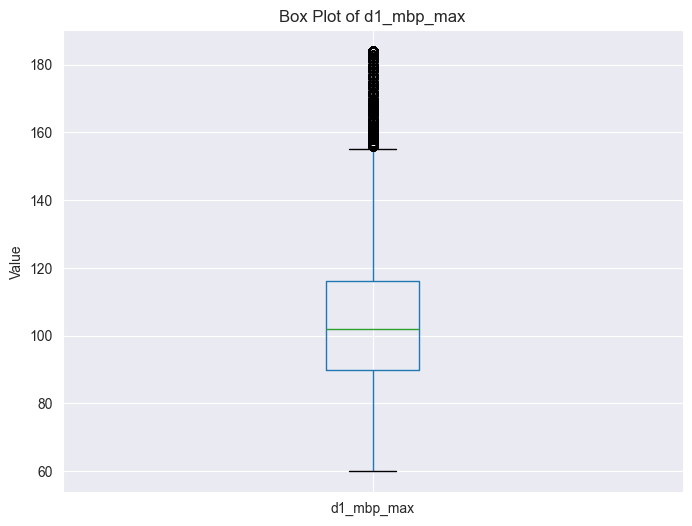

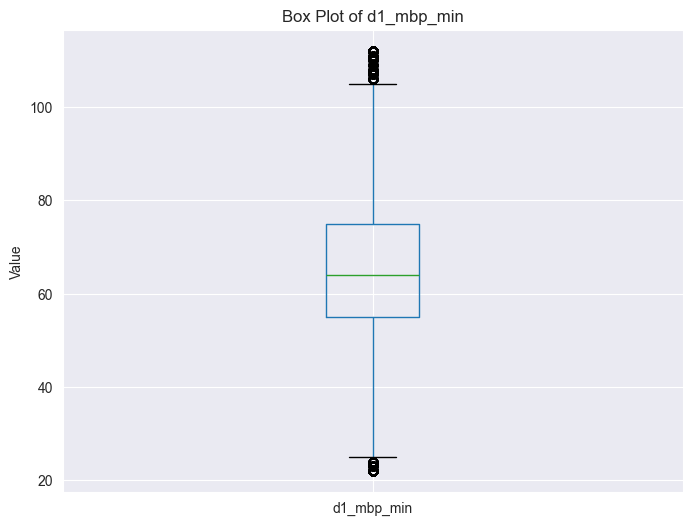

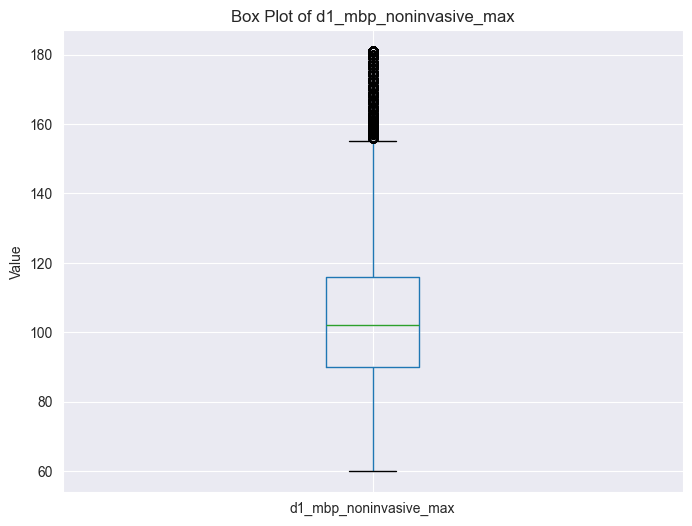

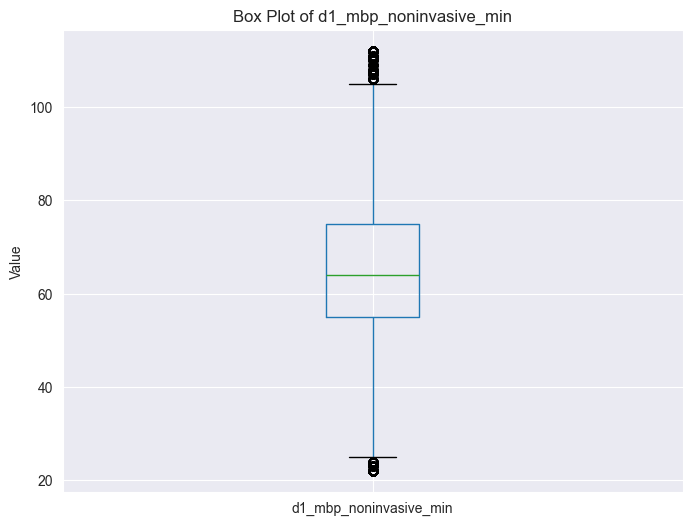

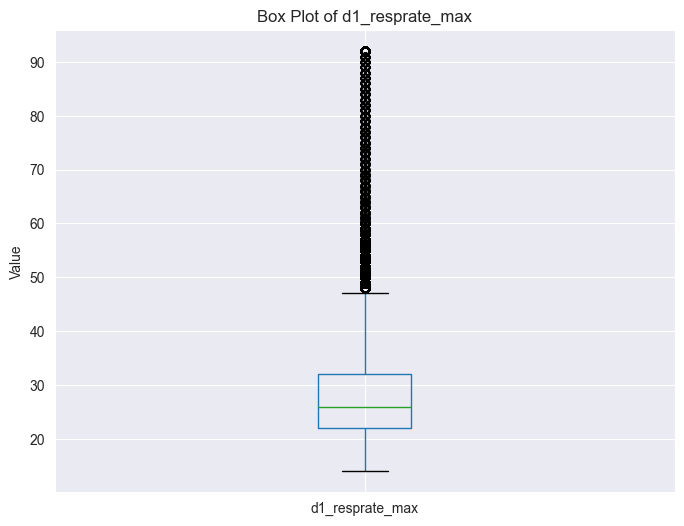

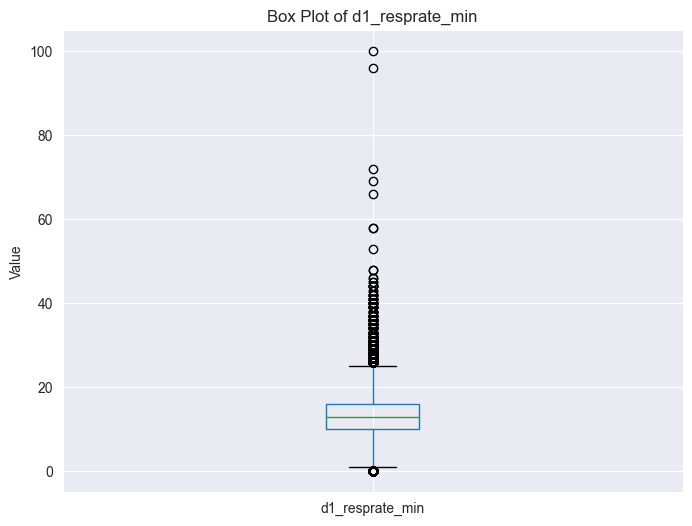

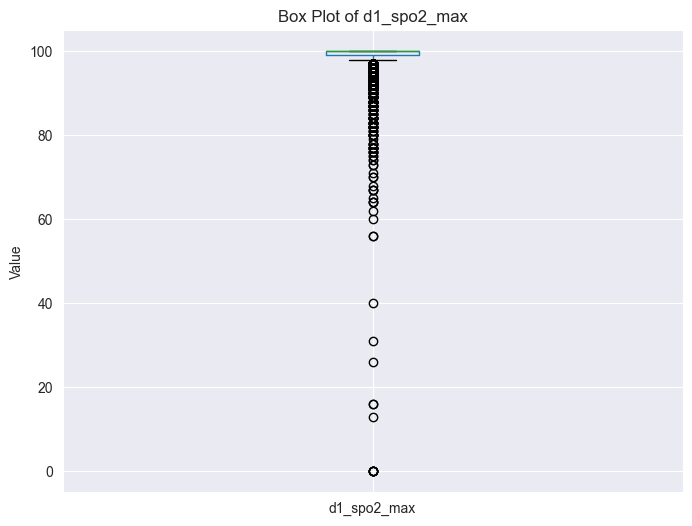

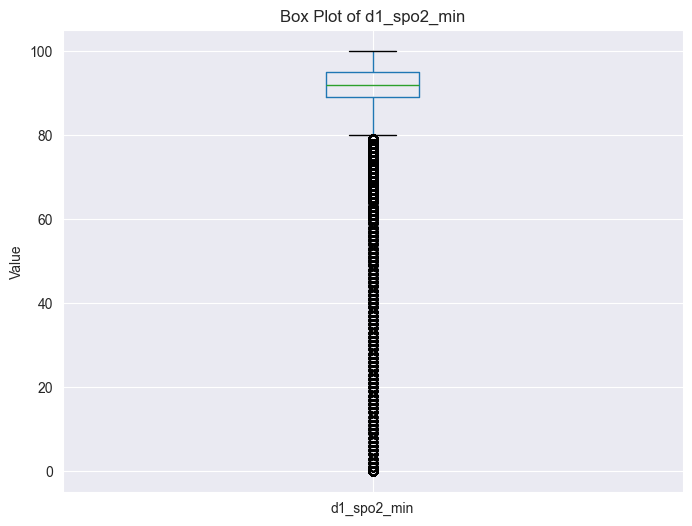

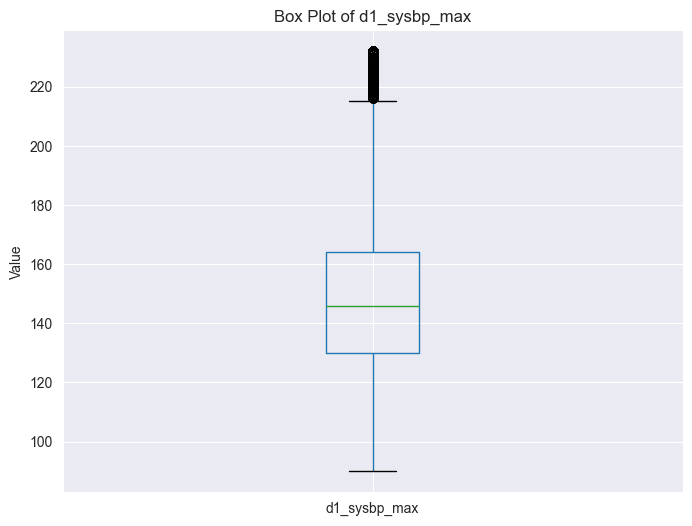

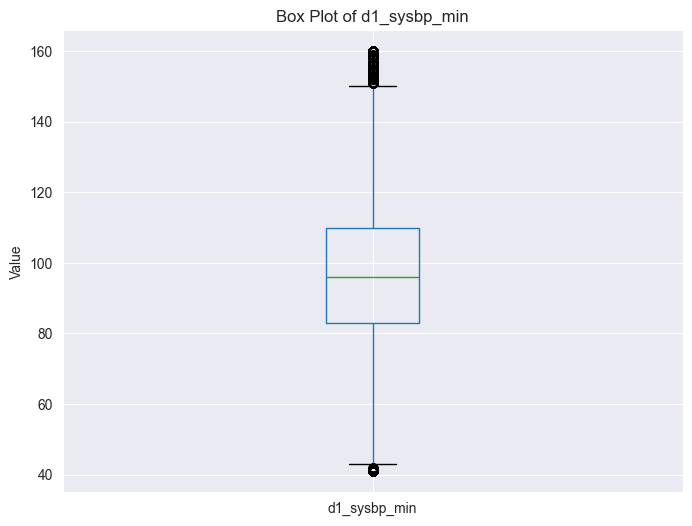

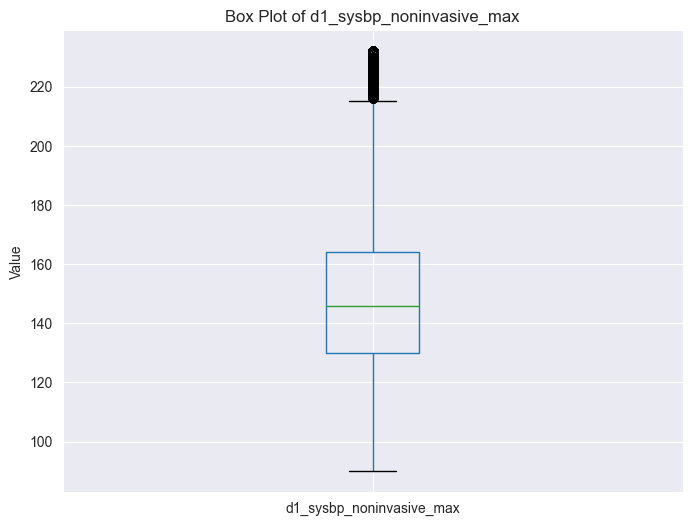

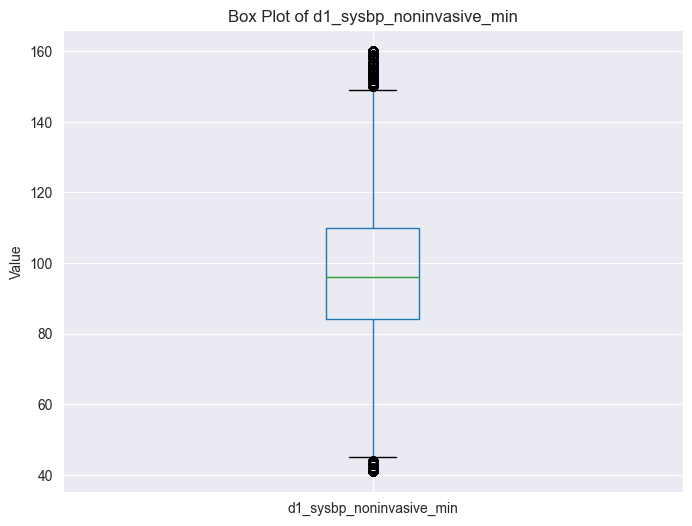

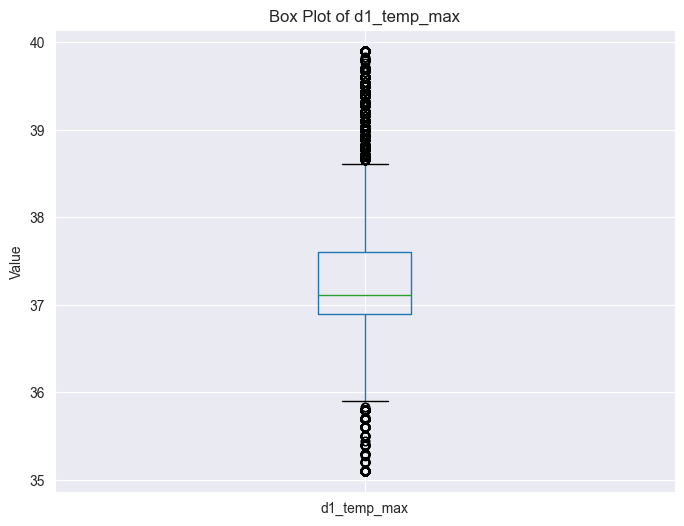

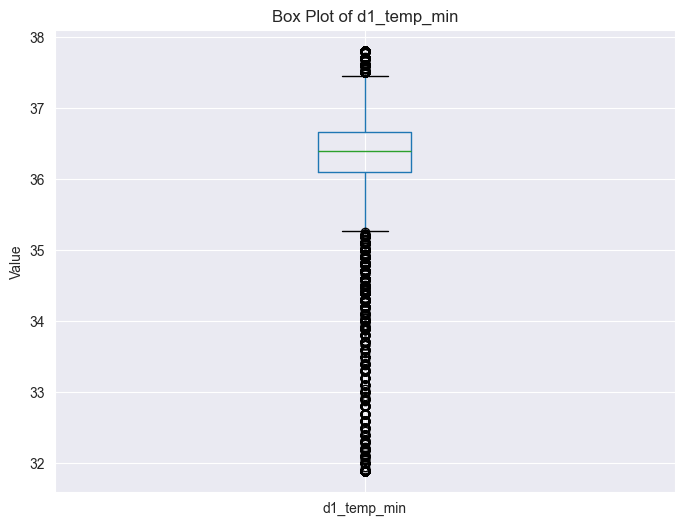

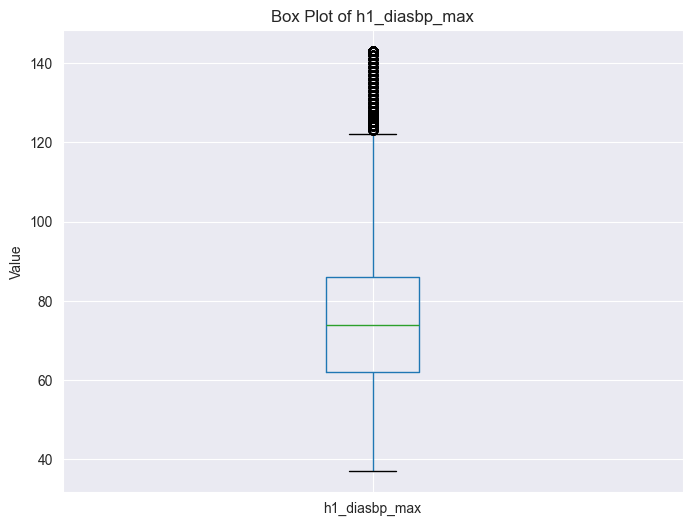

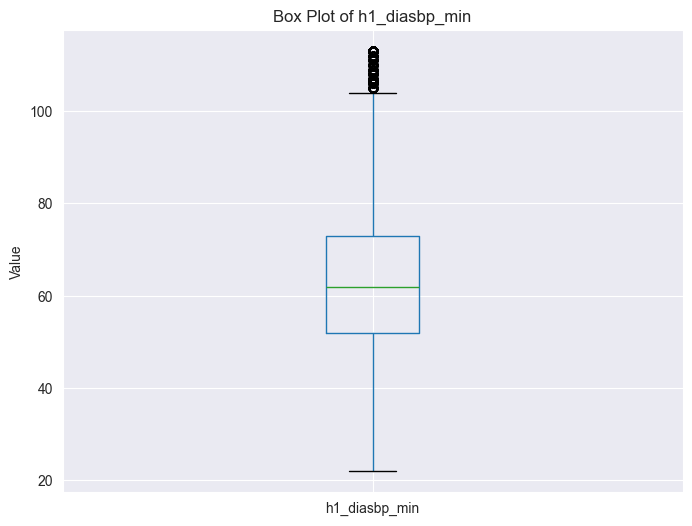

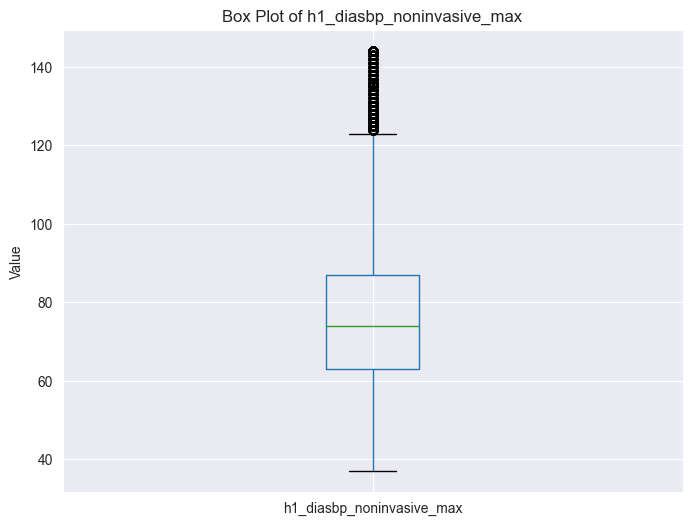

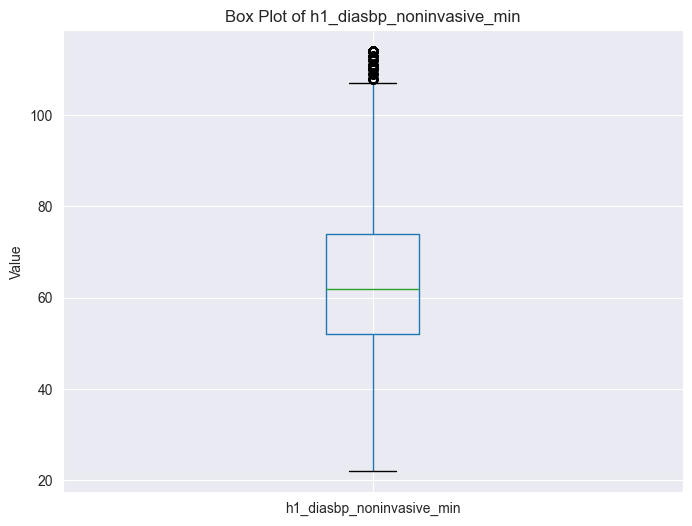

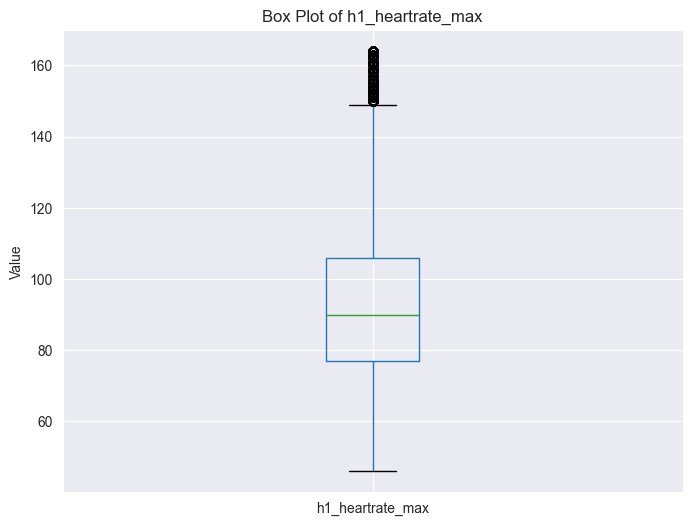

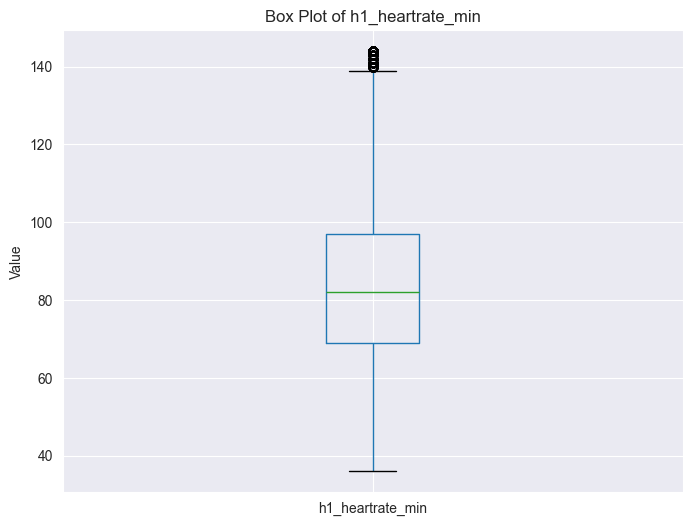

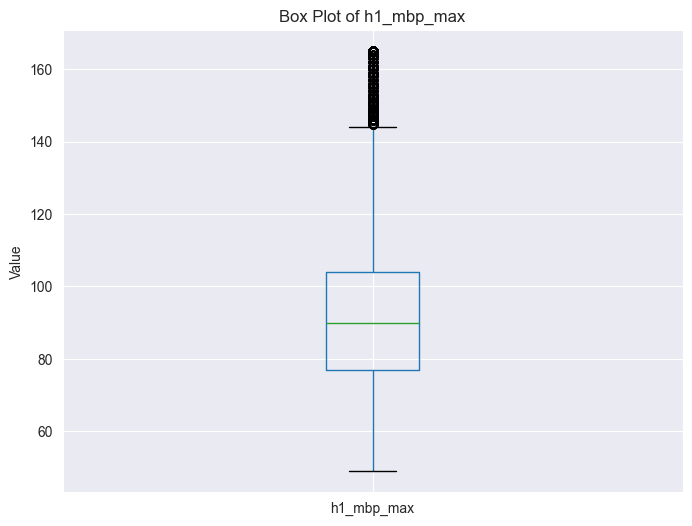

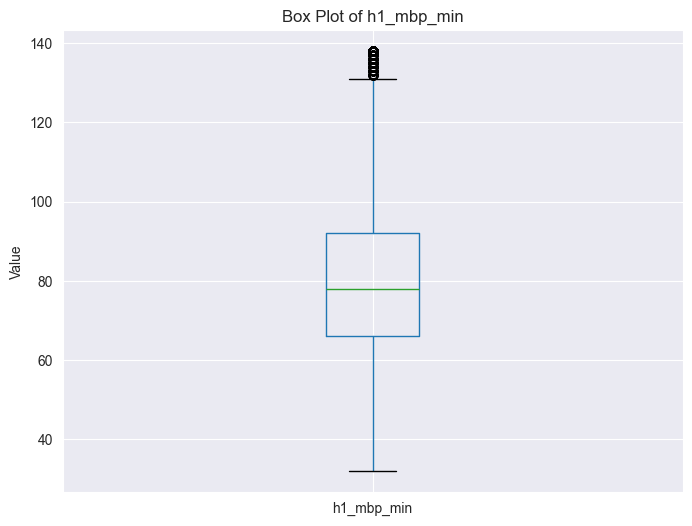

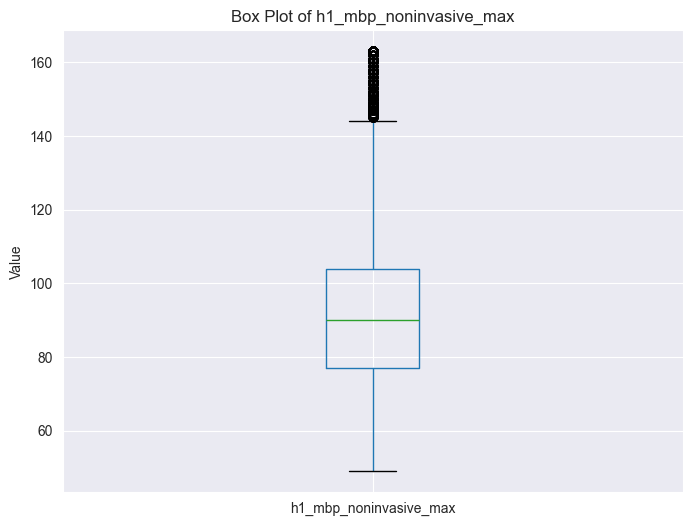

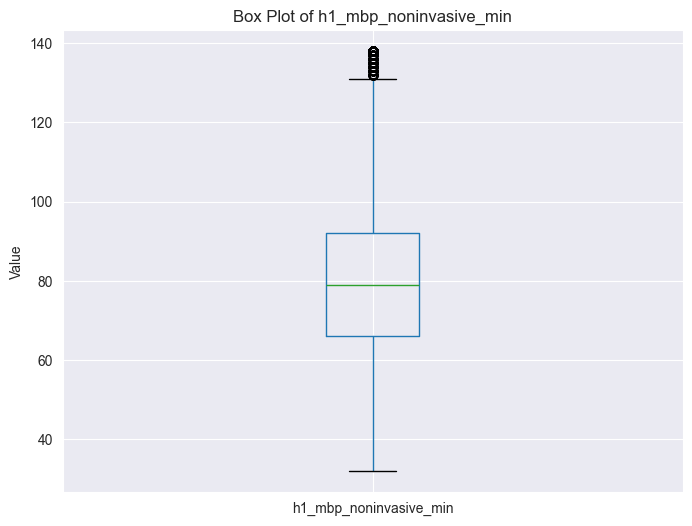

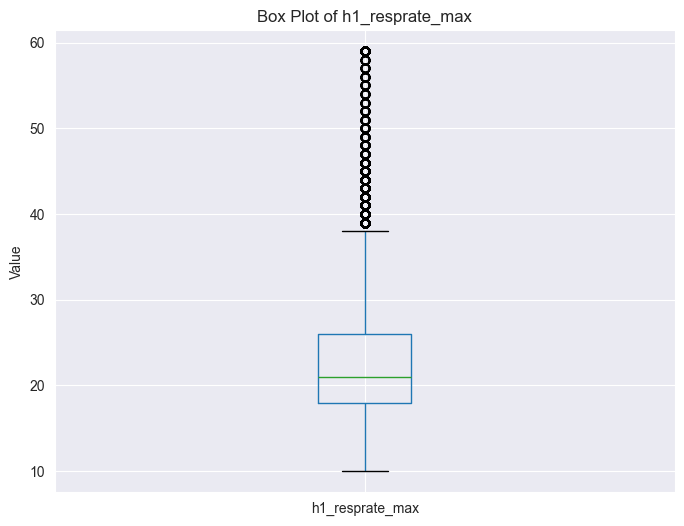

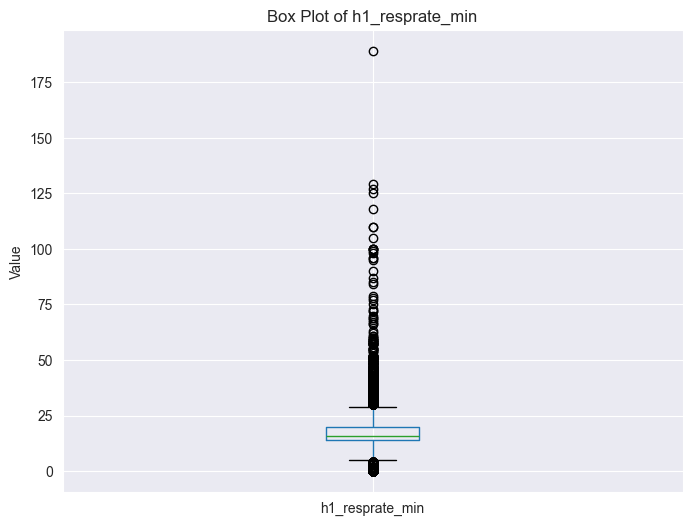

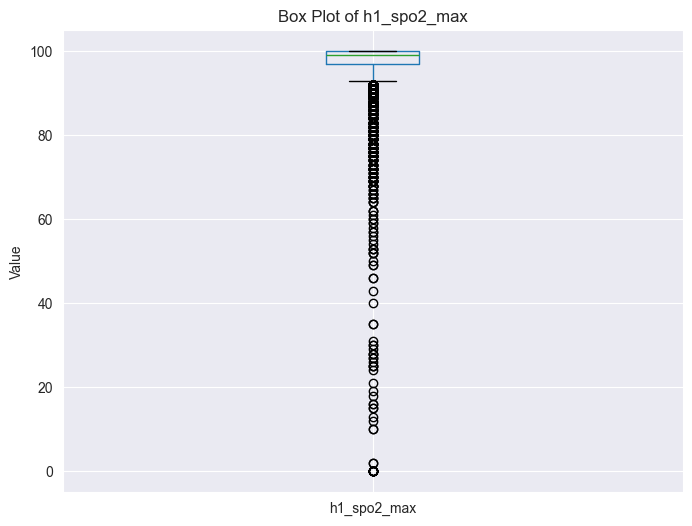

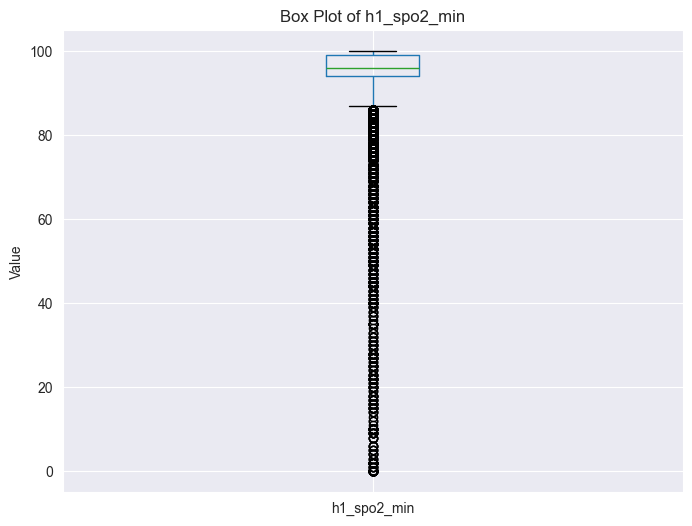

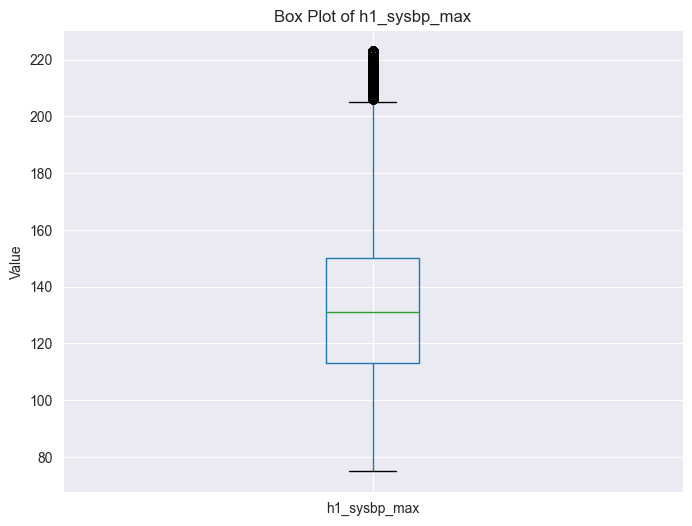

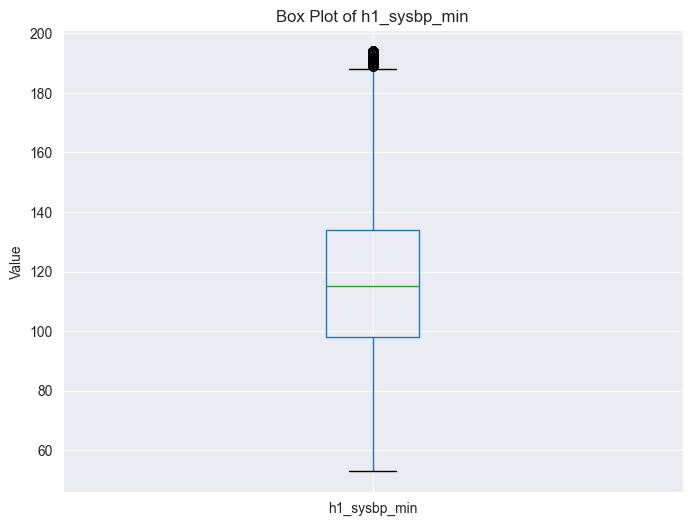

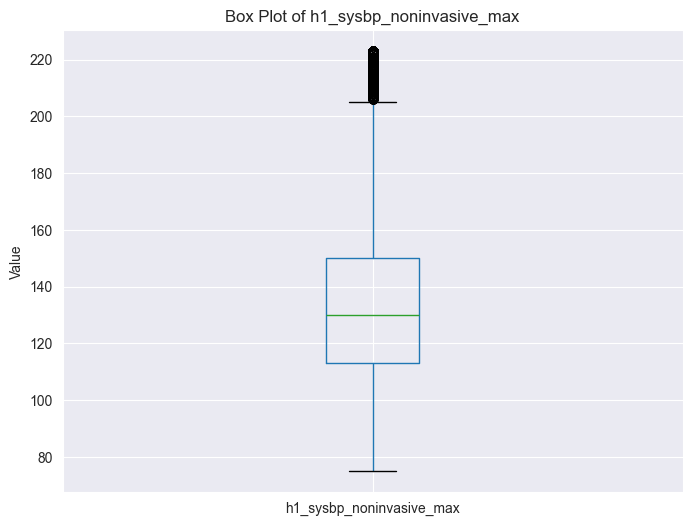

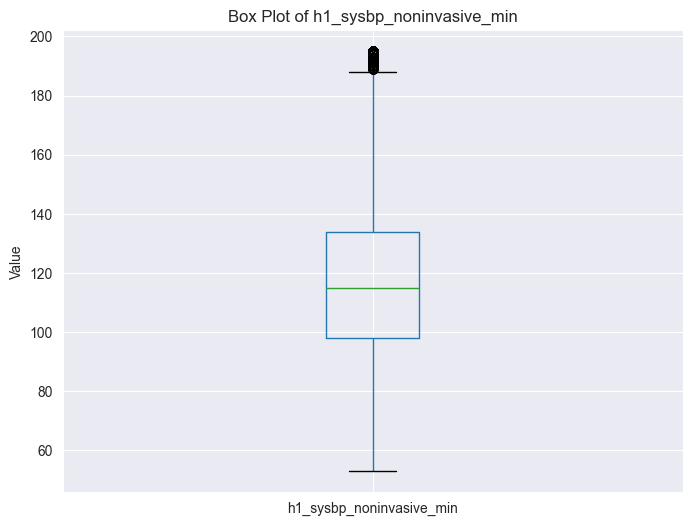

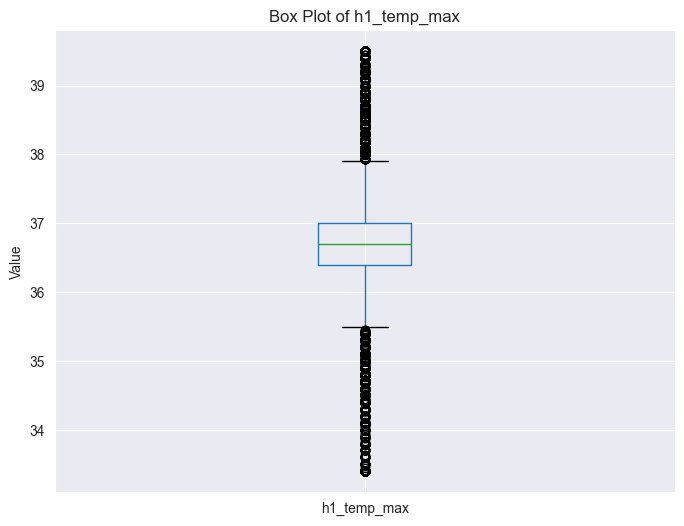

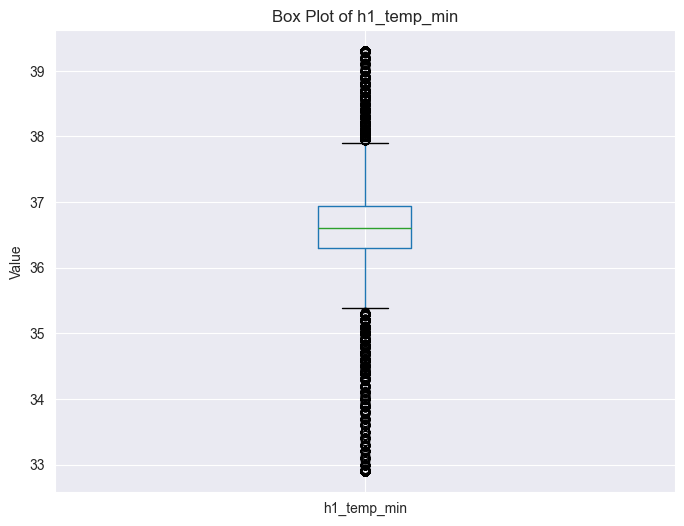

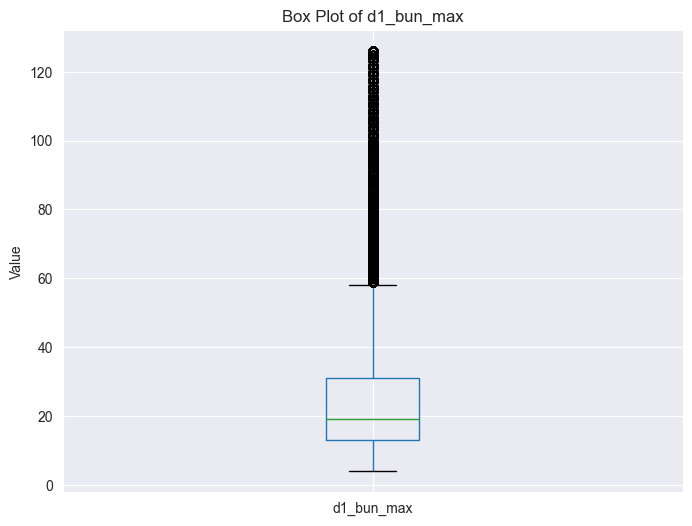

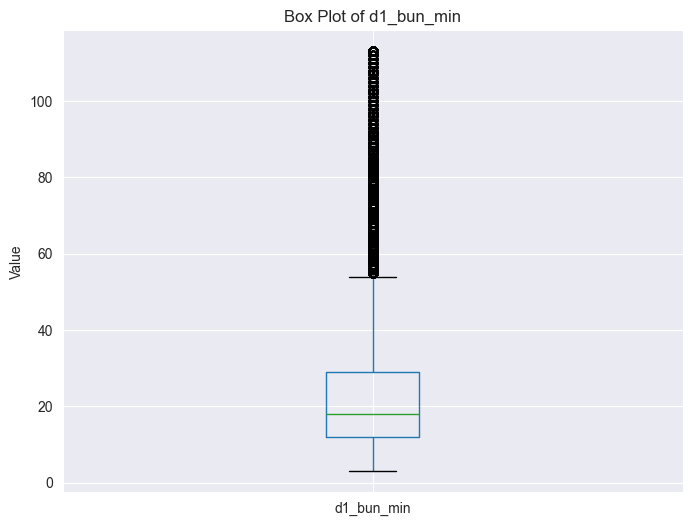

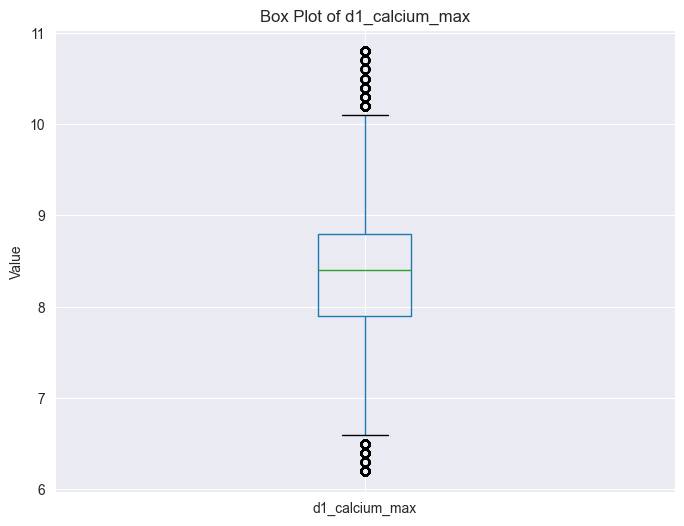

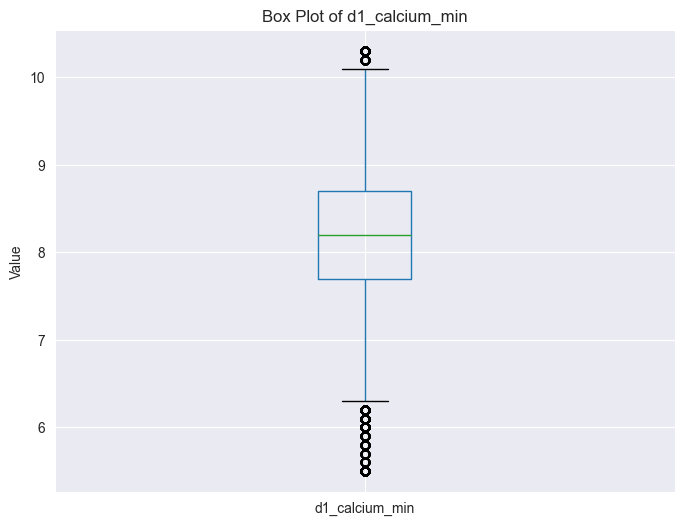

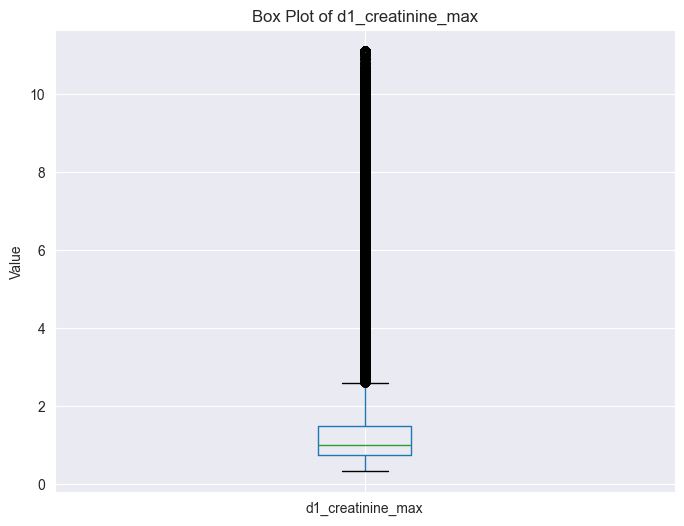

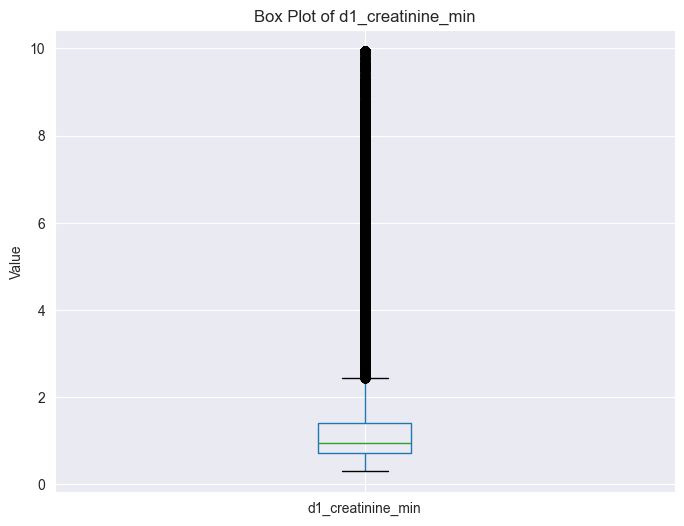

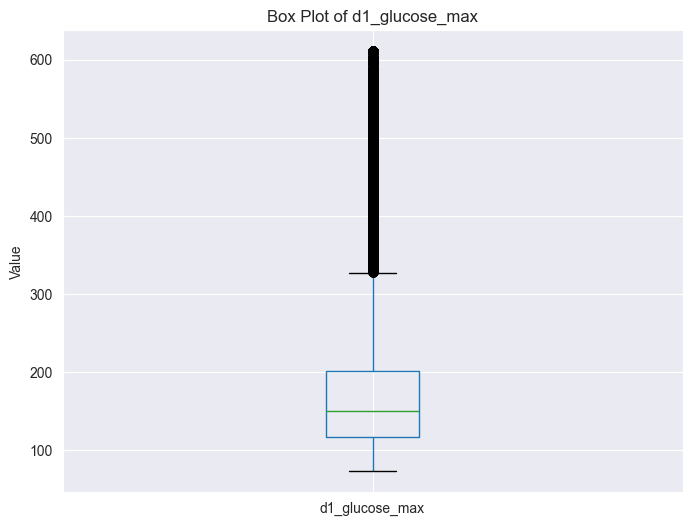

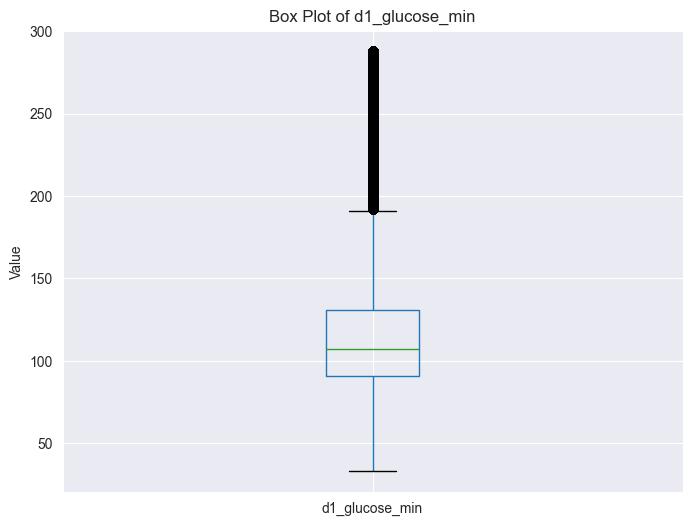

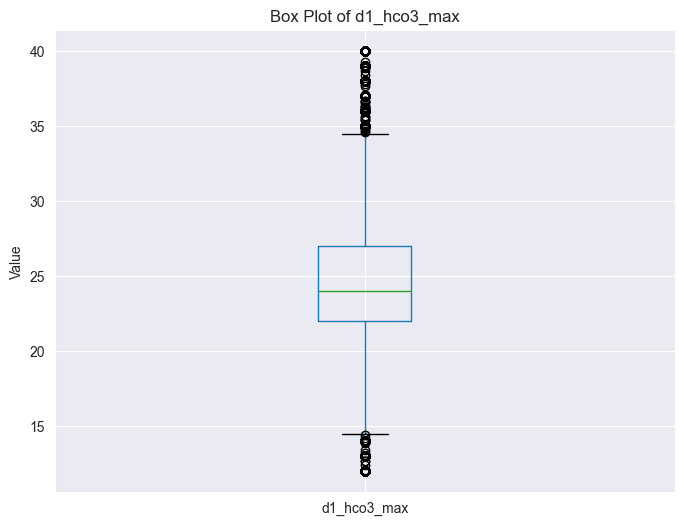

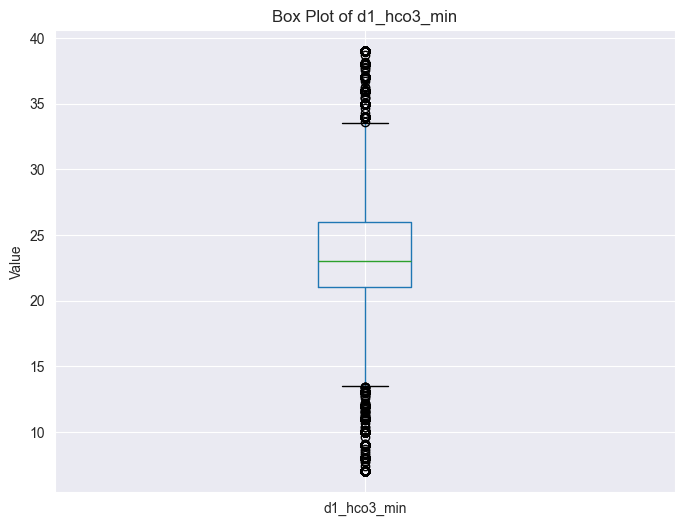

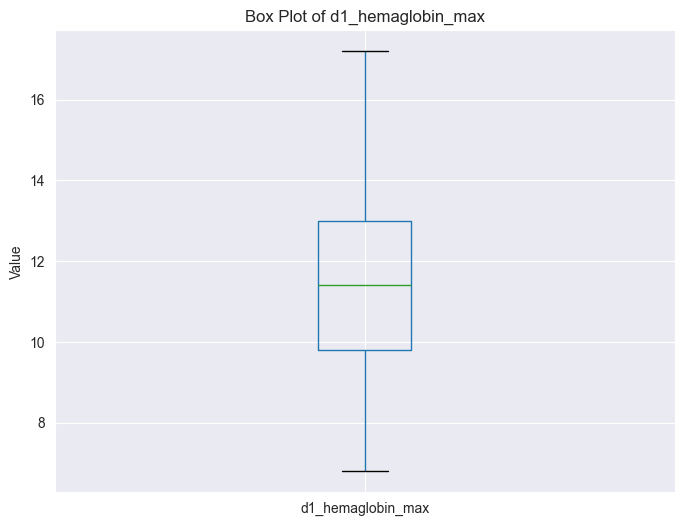

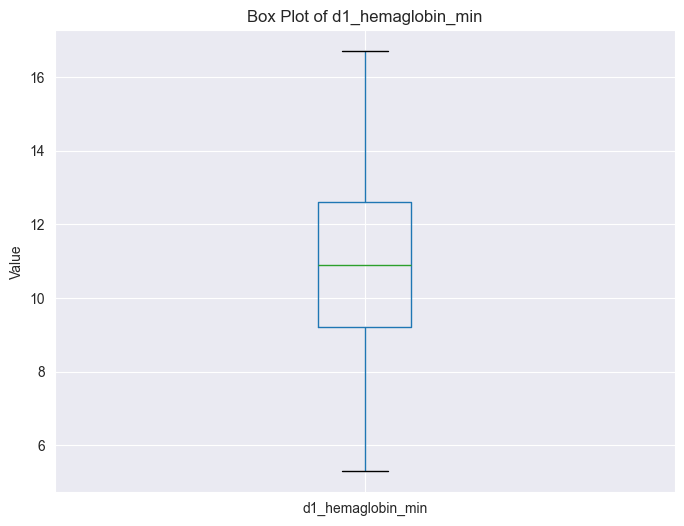

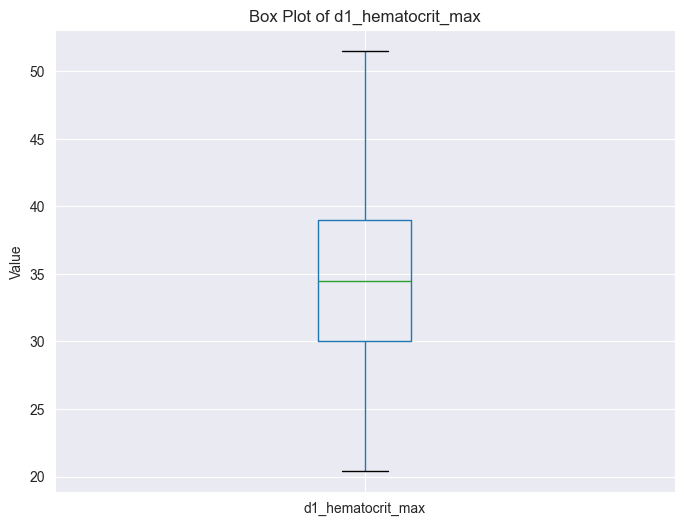

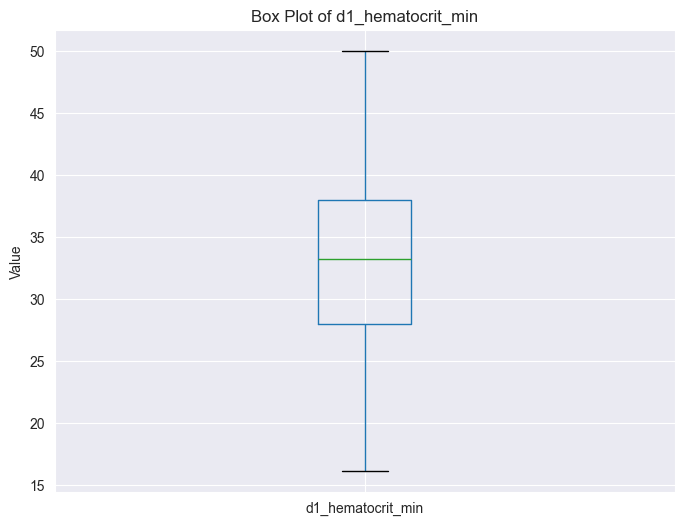

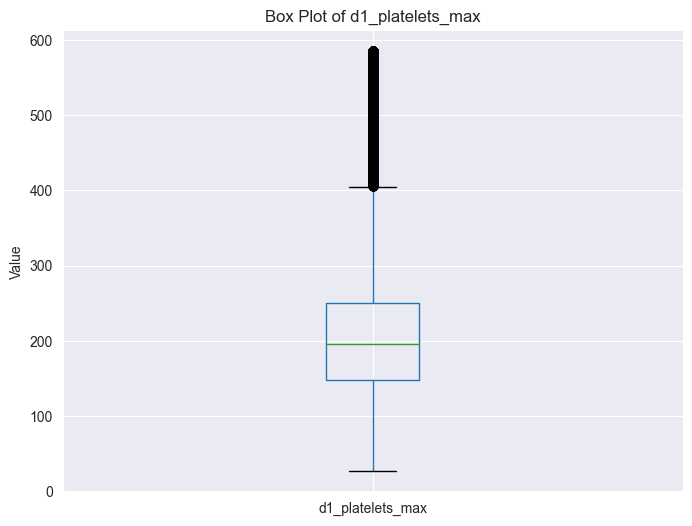

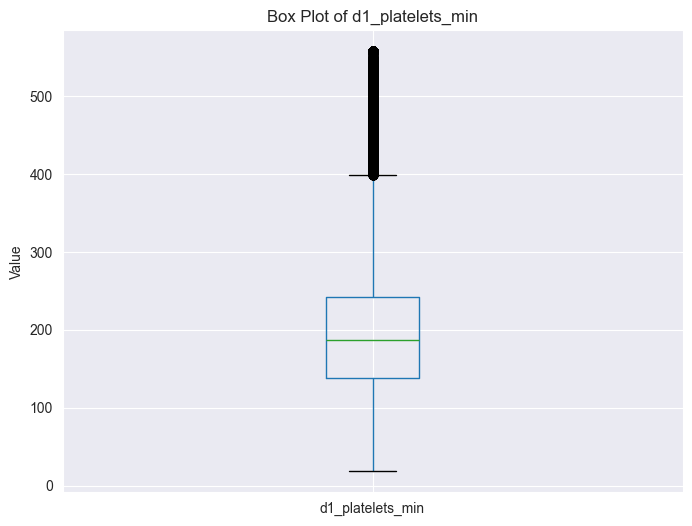

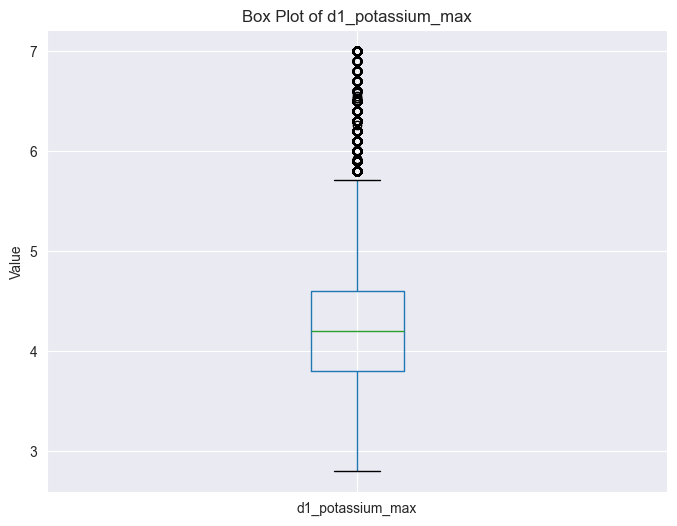

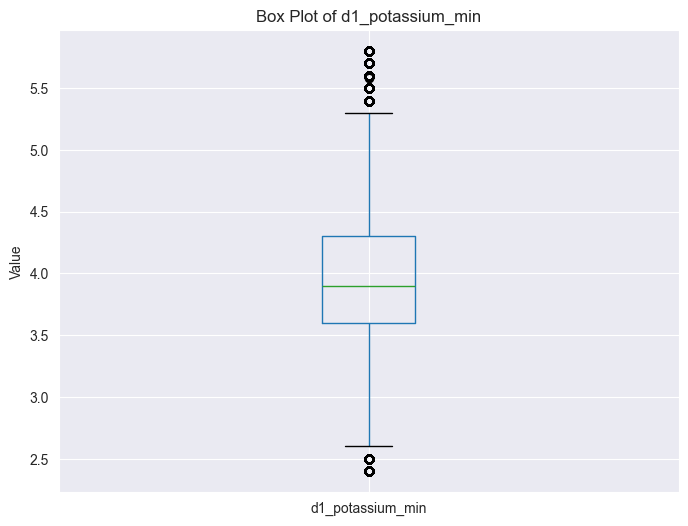

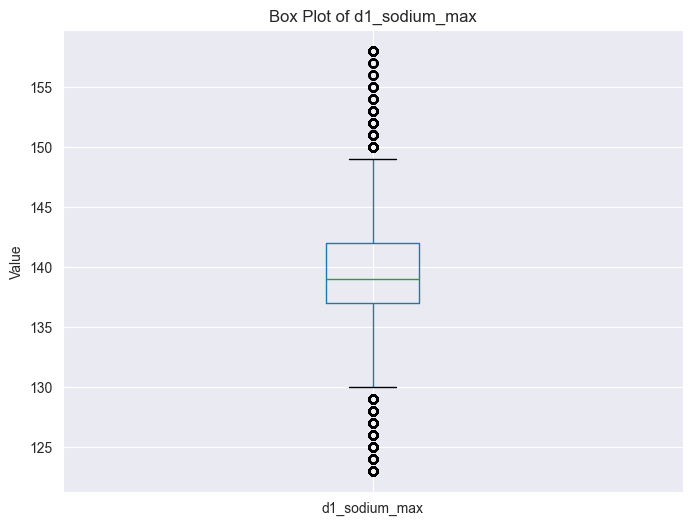

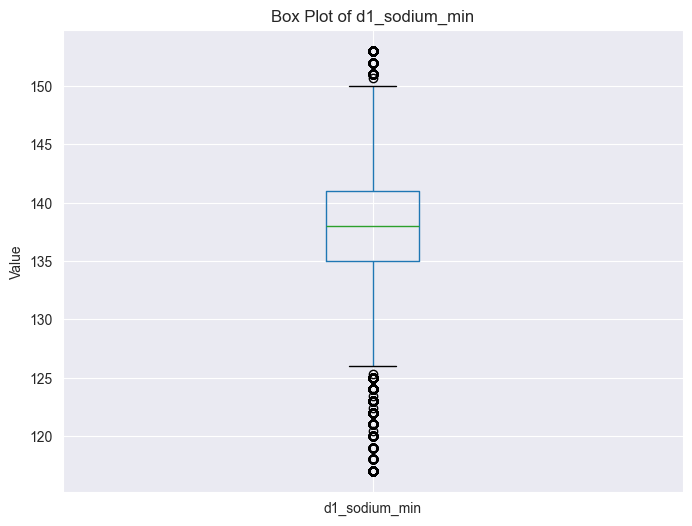

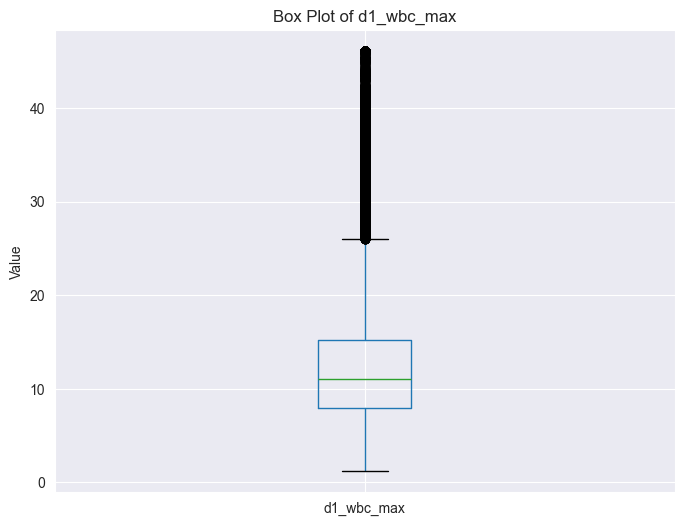

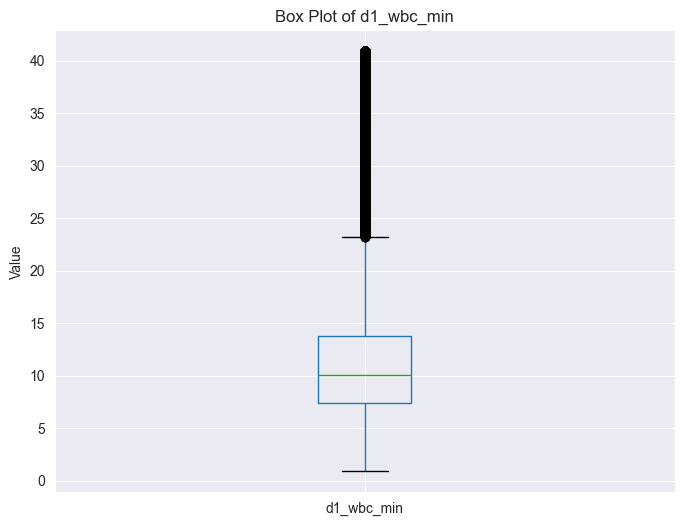

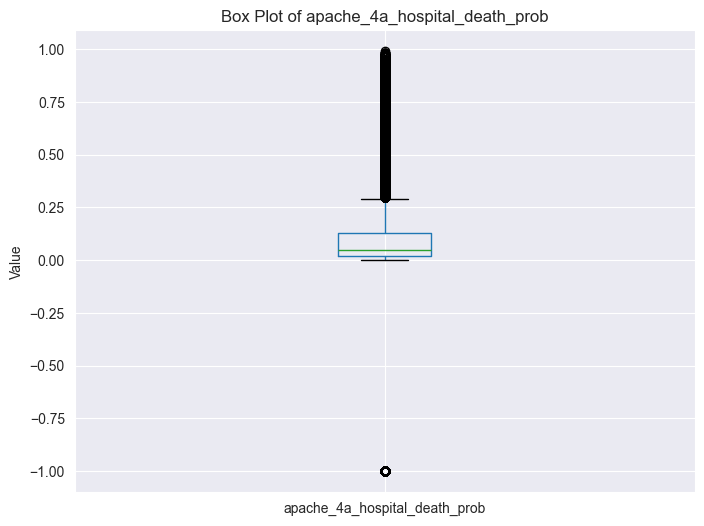

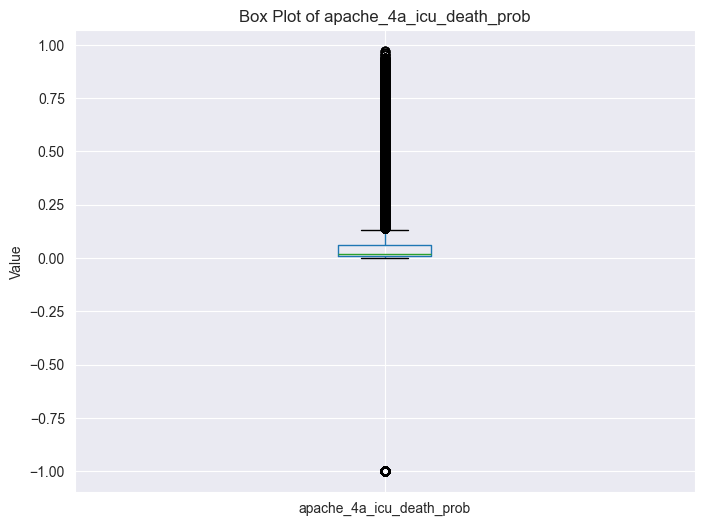

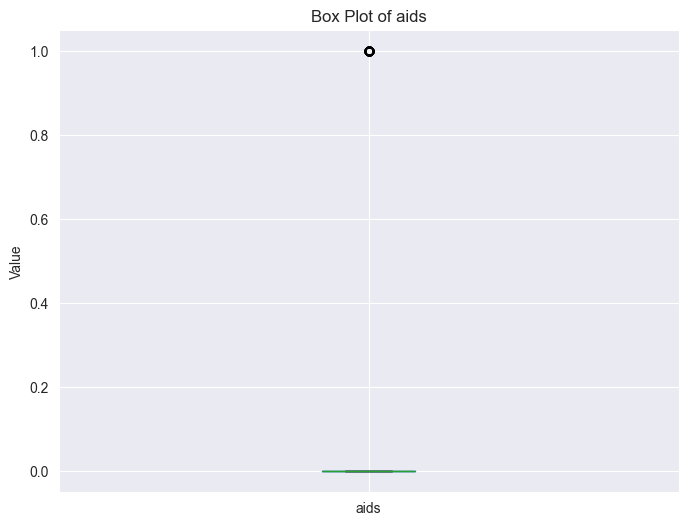

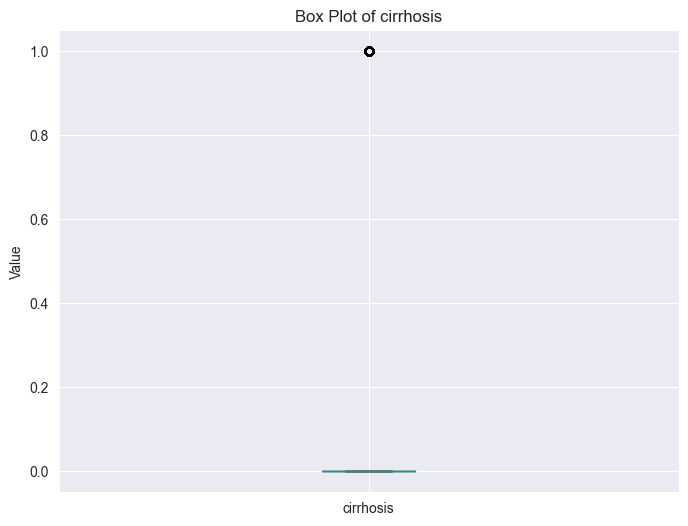

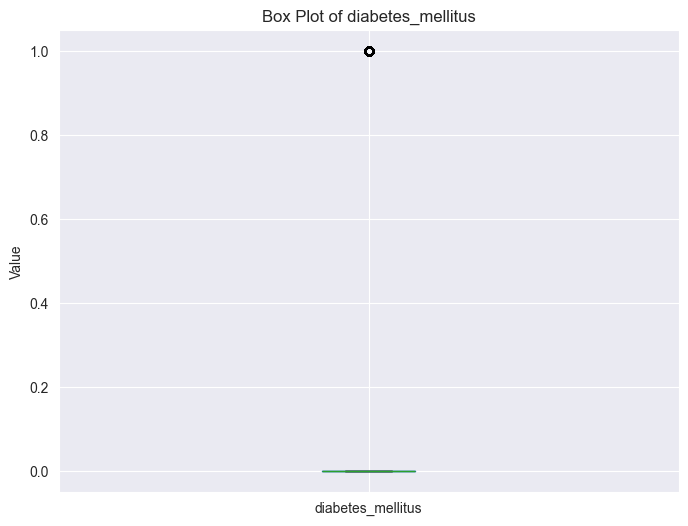

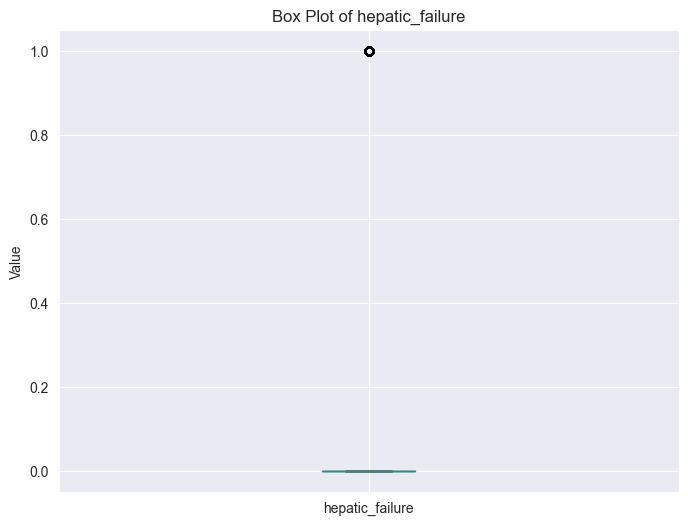

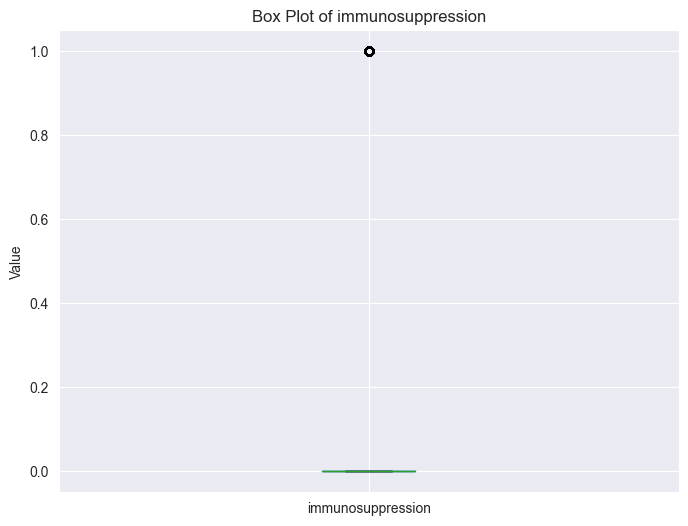

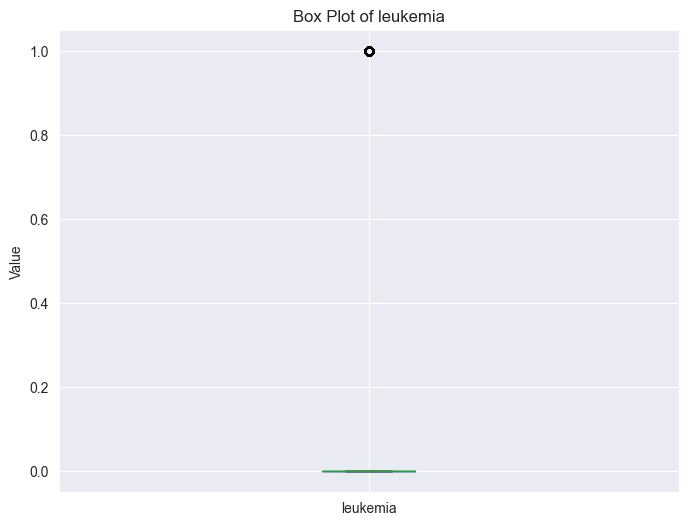

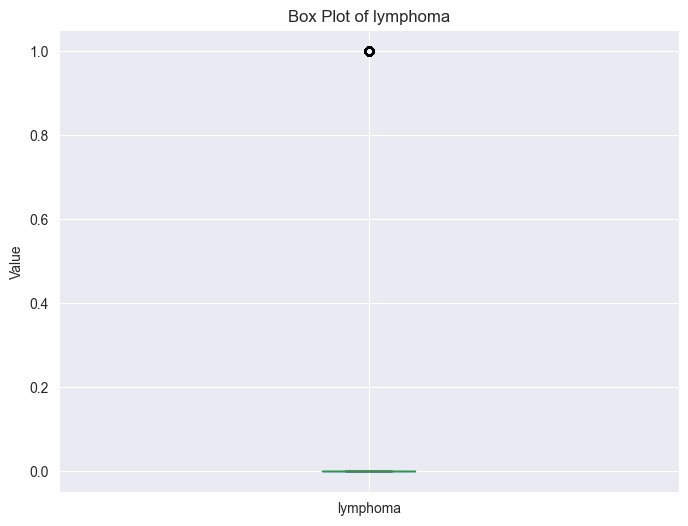

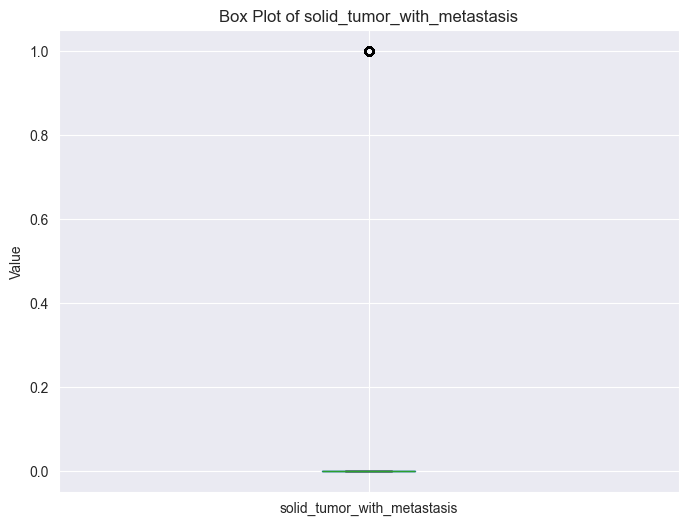

In [55]:
numeric_columns_copy = Df_Patients.select_dtypes(include=['int', 'float']).columns

filtered_columns_copy = [col for col in numeric_columns_copy if len(Df_Patients[col].unique()) > 3 and not col.endswith('_id')]

for column in filtered_columns_copy:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Value')
    plt.show()

In [56]:
Df_Patients['age'].min()

16.0

In [57]:
Df_Patients['age'].max()

113.01232209877213